In [ ]:
# Assignment 2: Yogen Pradhan
# Reg : 23366
# Importing necessary libraries
import torch
import torchvision
from torch import nn
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F
from torch.nn import init
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import optim
import seaborn as sns
from torchsummary import summary

# **Question** 1: Initializing weights of each of layers to samples from Gaussian with mean 0 and standard deviation 0.01

In [ ]:
# For tanh activation function with mean 0 and std=0.01 weight initialized
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(1000,500)  #Input with 1000 features
    self.fc2 = nn.Linear(500,500) #500 hidden nodes
    self.fc3 = nn.Linear(500,500)
    self.fc4 = nn.Linear(500,500) #Output has 500 features
    init.normal_(self.fc1.weight,mean = 0,std =0.01)   #Initializing weights of each layer to sample from Gausiaan with mean 0 and std 0.01
    init.normal_(self.fc2.weight,mean = 0,std =0.01)
    init.normal_(self.fc3.weight,mean = 0,std =0.01)
    init.normal_(self.fc4.weight,mean = 0,std =0.01)
  def forward(self,x):
    x=self.flatten(x)
    data = []   #List to store all the activations of each layer
    data.append(x)
    print(f"Layer 0 (Input) Activation: {x}")
    x= F.tanh(self.fc1(x))  #applying activation tanh in layer1
    data.append(x)
    print(f"Layer 1 Activation: {x}")
    x = F.tanh(self.fc2(x)) #Activation in layer 2
    data.append(x)
    print(f"Layer 2 Activation: {x}")
    x= F.tanh(self.fc3(x)) #Activation in layer3
    data.append(x)
    print(f"Layer 3 Activation: {x}")
    x = F.tanh(self.fc4(x))
    data.append(x)
    print(f"Layer 4 Activation: {x}")
    return x,data   #returning the ouput
model1 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:
input = torch.randn(1,1000)    #Random input
output,data1 = model1(input)

Layer 0 (Input) Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -

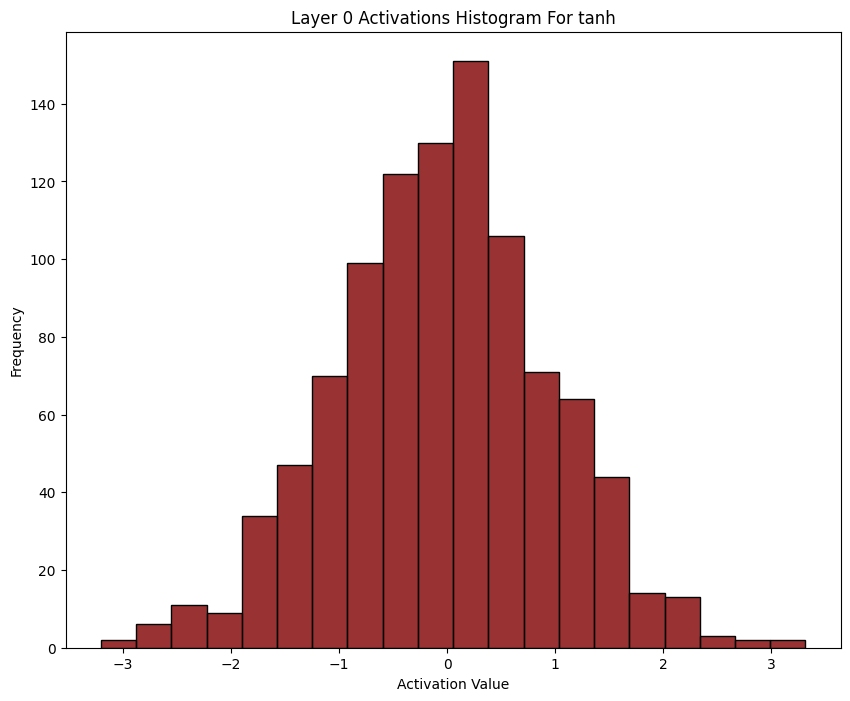

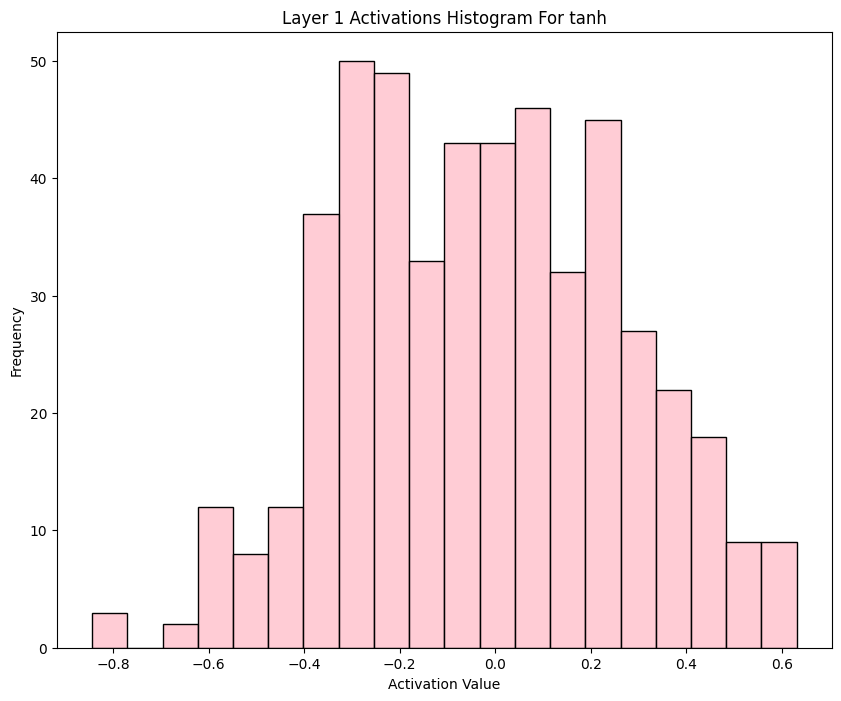

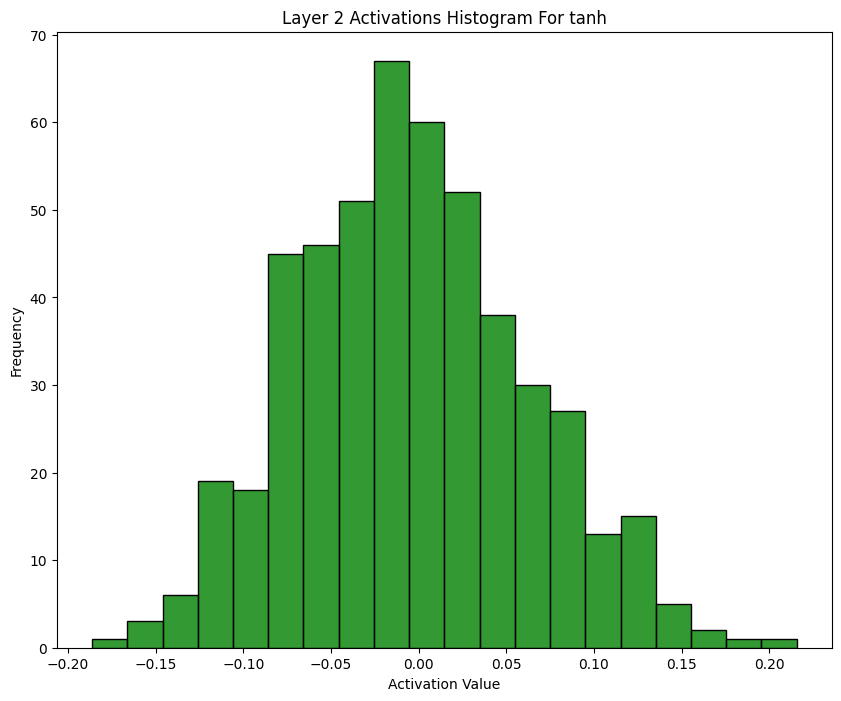

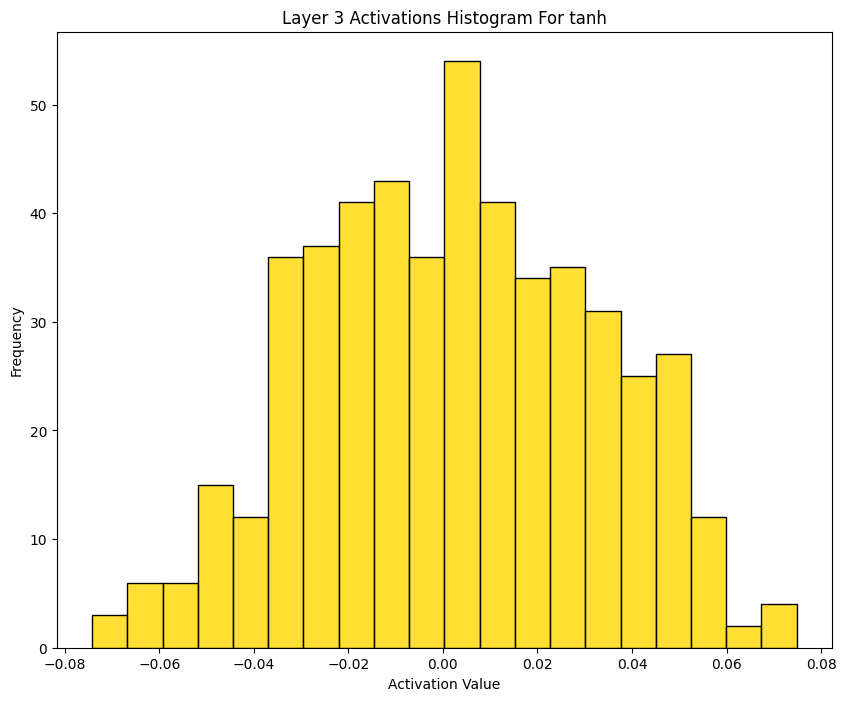

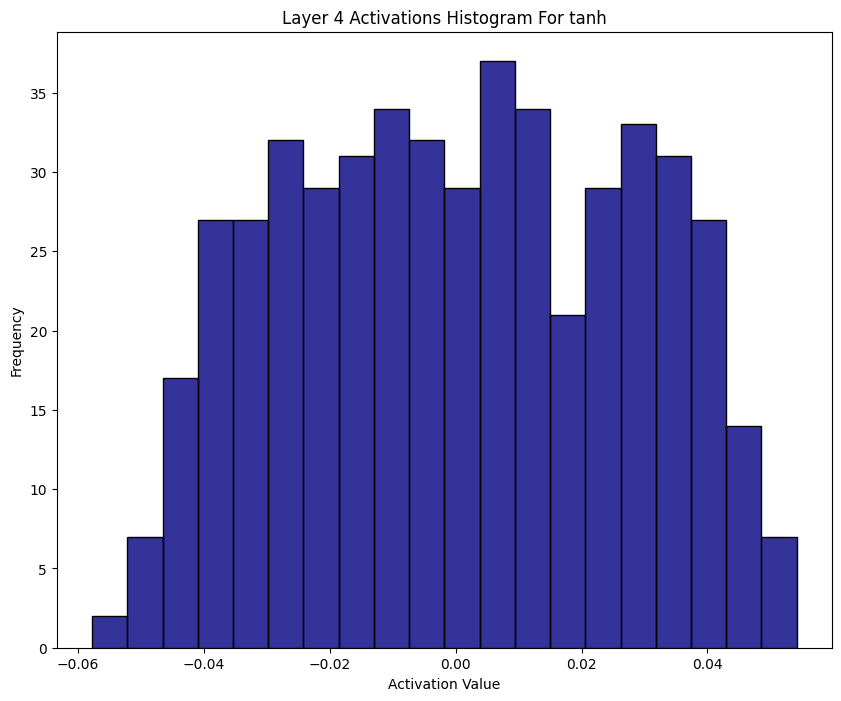

In [ ]:

color = ["maroon","pink","green","gold","navy"]
for i, activation in enumerate(data1):
    # plt.figure()
    plt.figure(figsize=(10,8))
    sns.histplot(activation.detach().numpy().flatten(),alpha =0.8, bins=20,color=color[i])
    plt.title(f"Layer {i} Activations Histogram For tanh")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

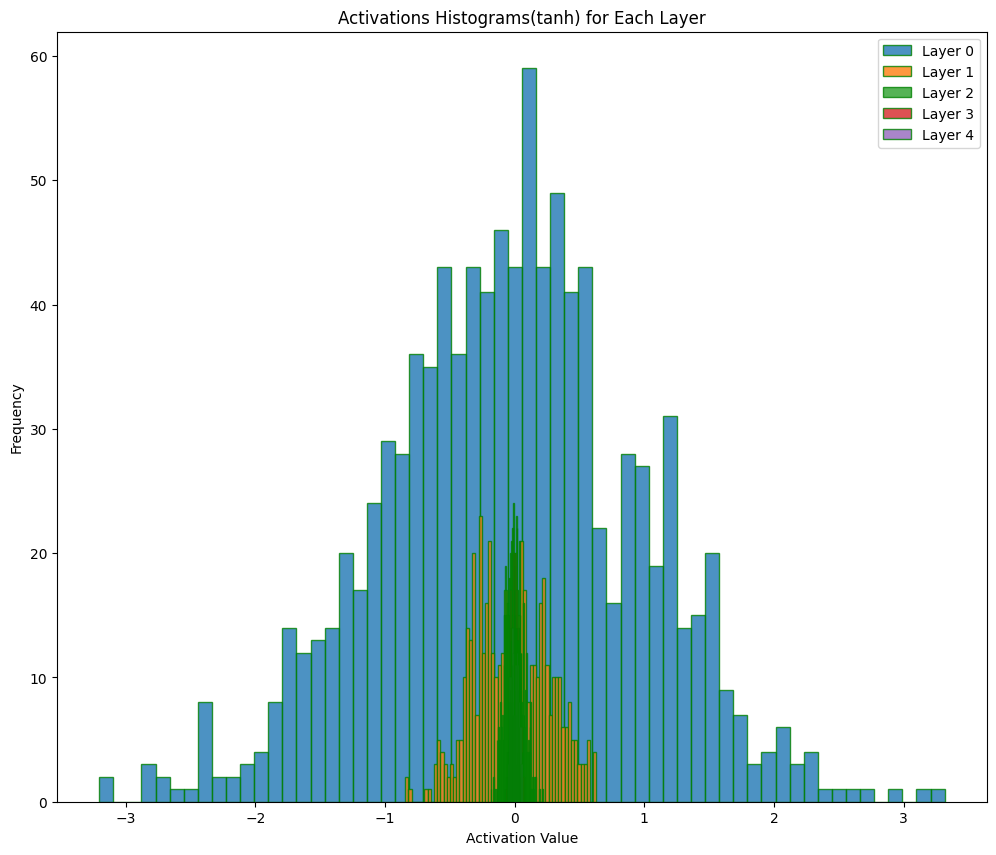

In [ ]:
plt.figure(figsize=(12,10))
for i, activation in enumerate(data1):
    plt.hist(activation.detach().numpy().flatten(), bins=60, alpha=0.8, label=f"Layer {i}",   edgecolor="green")

plt.title("Activations Histograms(tanh) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

 **Observation** :
In this histogram we see that due to tanh activation function much of activation values are around center(0) and we see  as we go deeper and deeper into the network we start to see saturation effects as the activation values are concentrated towards -1 or 1.This is because of tanh function as it has large positive inputs.
This saturation of activations can lead to Vanishing Gradient Problem.

---




# **Question 2:** For sigmoid activation and weights from Gaussian with mean 0 and std 0.01

In [ ]:
# For sigmoid activation function with mean 0 and std=0.01 weight initialized
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(1000,500)
    self.fc2 = nn.Linear(500,500)
    self.fc3 = nn.Linear(500,500)
    self.fc4 = nn.Linear(500,500)
    init.normal_(self.fc1.weight,mean = 0,std =0.01)
    init.normal_(self.fc2.weight,mean = 0,std =0.01)
    init.normal_(self.fc3.weight,mean = 0,std =0.01)
    init.normal_(self.fc4.weight,mean = 0,std =0.01)
  def forward(self,x):
    x=self.flatten(x)
    data = []
    data.append(x)
    print(f"Layer 0 Activation: {x}")
    x= F.sigmoid(self.fc1(x))
    data.append(x)
    print(f"Layer 1 Activation: {x}")
    x = F.sigmoid(self.fc2(x))
    data.append(x)
    print(f"Layer 2 Activation: {x}")
    x= F.sigmoid(self.fc3(x))
    data.append(x)
    print(f"Layer 3 Activation: {x}")
    x = F.sigmoid(self.fc4(x))
    data.append(x)
    print(f"Layer 4 Activation: {x}")
    return x,data

model2 = NeuralNetwork()
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:
output2,data2 = model2(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

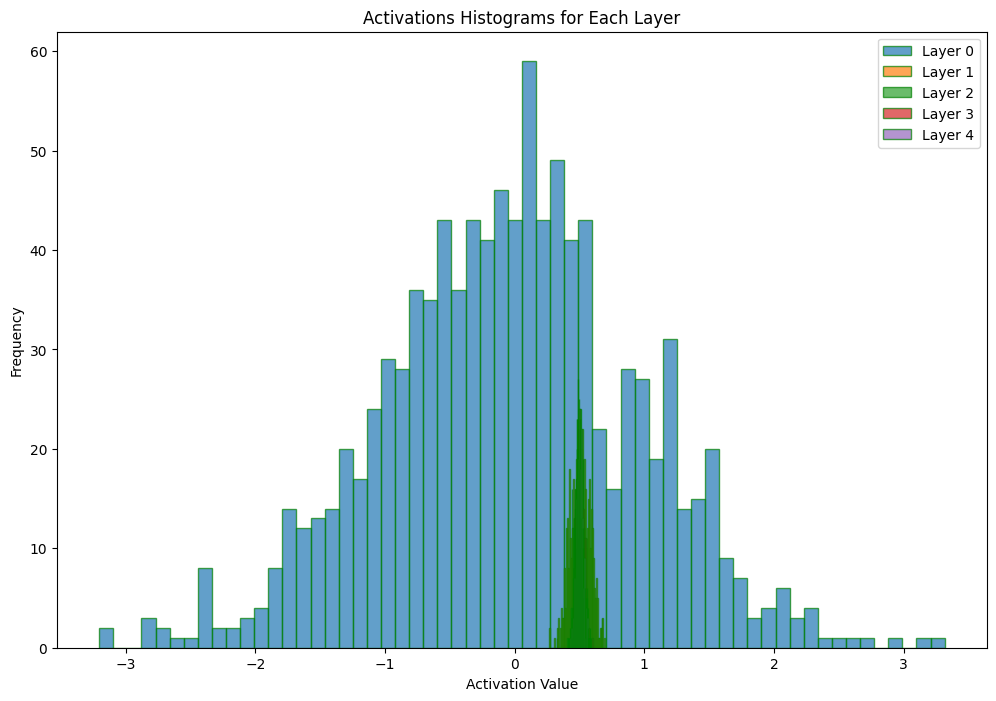

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data2):
    plt.hist(activation.detach().numpy().flatten(), bins=60, alpha=0.7, label=f"Layer {i}",edgecolor ="green")

plt.title("Activations Histograms for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation:** *Since the sigmoid activation function saturates as the input moves towards either extreme,due to which here we can see for large positive inputs,the sigmoid function outputs values close to 1.Due to mean value close to 0.5 for sigmoid ,the histogram have peak around 0.5 with inputs centered around 0.
Output range is limited to interval (0,1) unline tanh which had range around (-1,1).
This can also lead to Vanishing Gradient problem.Compared to tanh function histogram ,sigmoid gives much smooth histogram as sigmoid has smooth nature.*


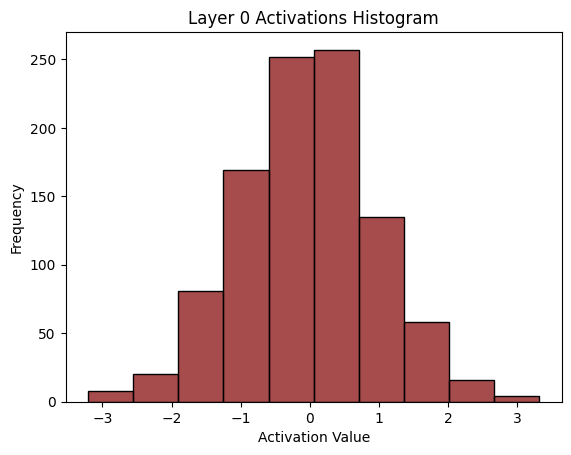

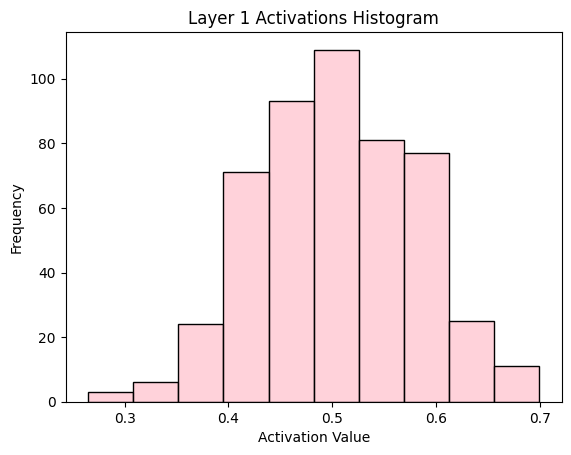

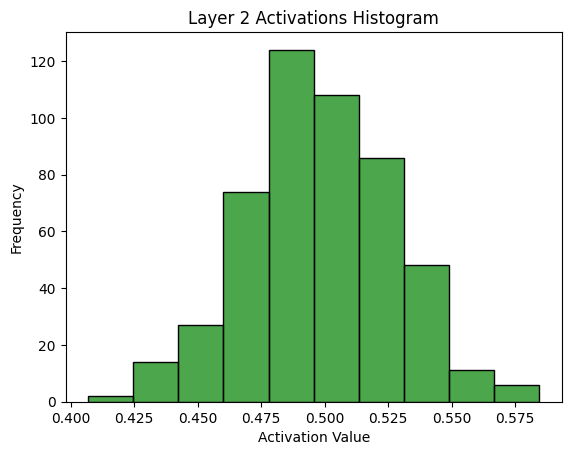

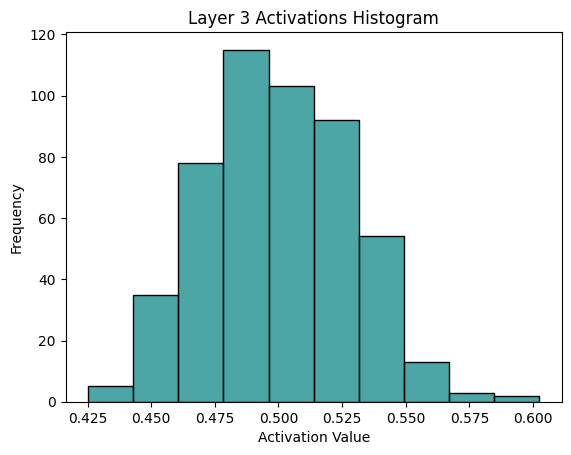

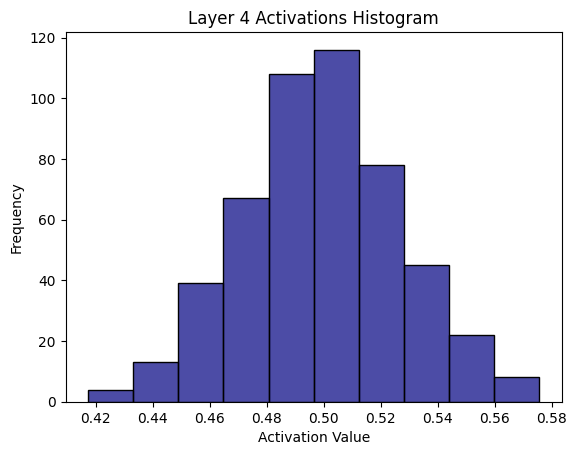

In [ ]:
color = ["maroon", "pink", "green", "teal", "navy"]

for i, activation in enumerate(data2):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,alpha=0.7, color=color[i])
    plt.title(f"Layer {i} Activations Histogram")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    plt.show()

# **Question 3:** For relu activation and weights from Gaussian with mean 0 and std 0.01

In [ ]:
# For ReLU activation function with mean 0 and std=0.01 weight initialized
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(1000,500)
    self.fc2 = nn.Linear(500,500)
    self.fc3 = nn.Linear(500,500)
    self.fc4 = nn.Linear(500,500)
    init.normal_(self.fc1.weight,mean = 0,std =0.01)
    init.normal_(self.fc2.weight,mean = 0,std =0.01)
    init.normal_(self.fc3.weight,mean = 0,std =0.01)
    init.normal_(self.fc4.weight,mean = 0,std =0.01)
  def forward(self,x):
    x=self.flatten(x)
    data = []
    data.append(x)
    print(f"Layer 0 Activation: {x}")
    x= F.relu(self.fc1(x))
    data.append(x)
    print(f"Layer 1 Activation: {x}")
    x = F.relu(self.fc2(x))
    data.append(x)
    print(f"Layer 2 Activation: {x}")
    x= F.relu(self.fc3(x))
    data.append(x)
    print(f"Layer 3 Activation: {x}")
    x = F.relu(self.fc4(x))
    data.append(x)
    print(f"Layer 4 Activation: {x}")
    return x,data

model3 = NeuralNetwork()
print(model3)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:
output3,data3 = model3(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

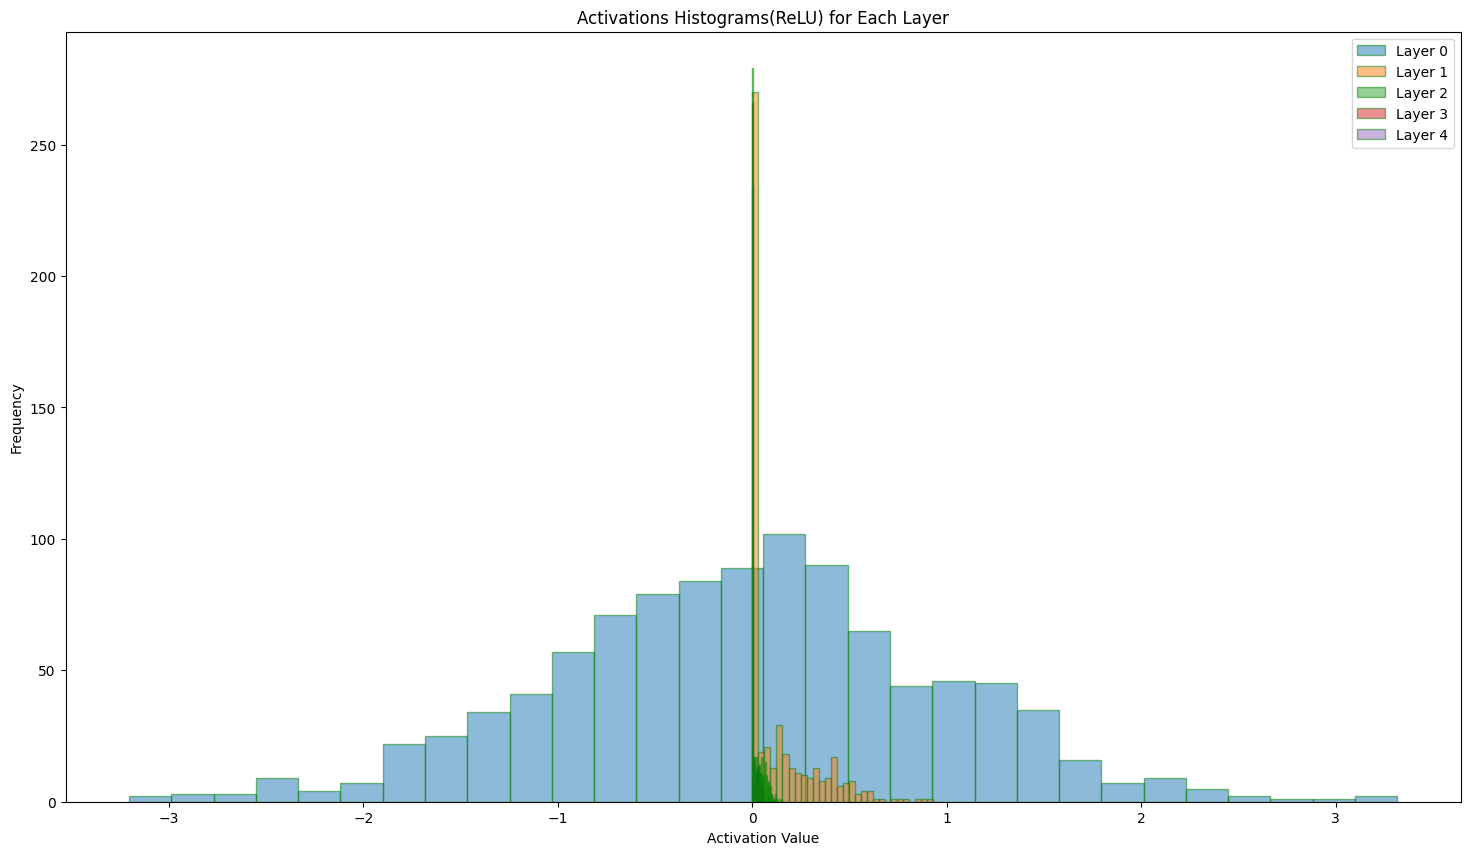

In [ ]:
plt.figure(figsize=(18,10))
for i, activation in enumerate(data3):
    plt.hist(activation.detach().numpy().flatten(), bins=30, alpha=0.5, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(ReLU) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

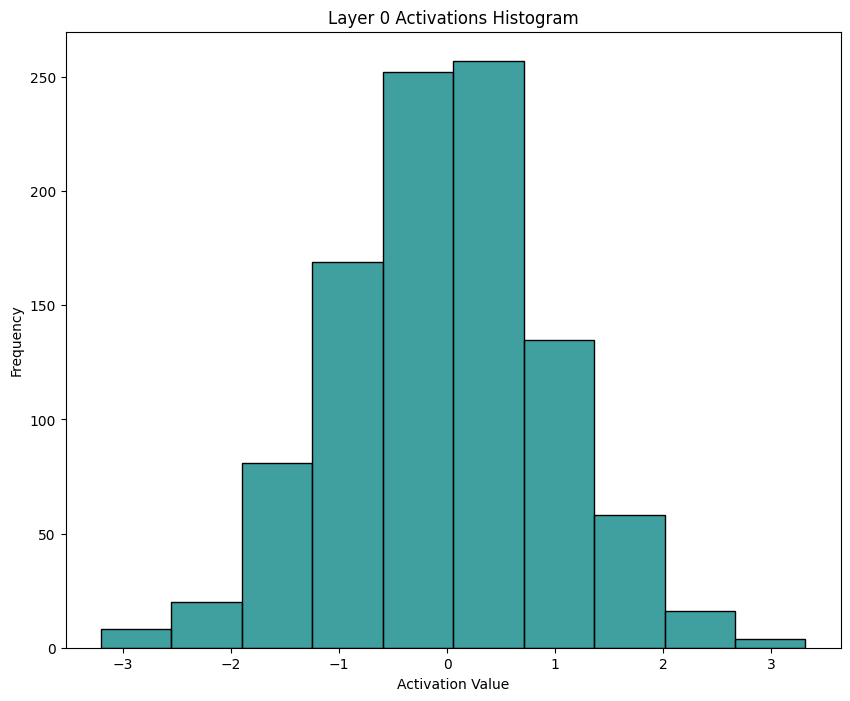

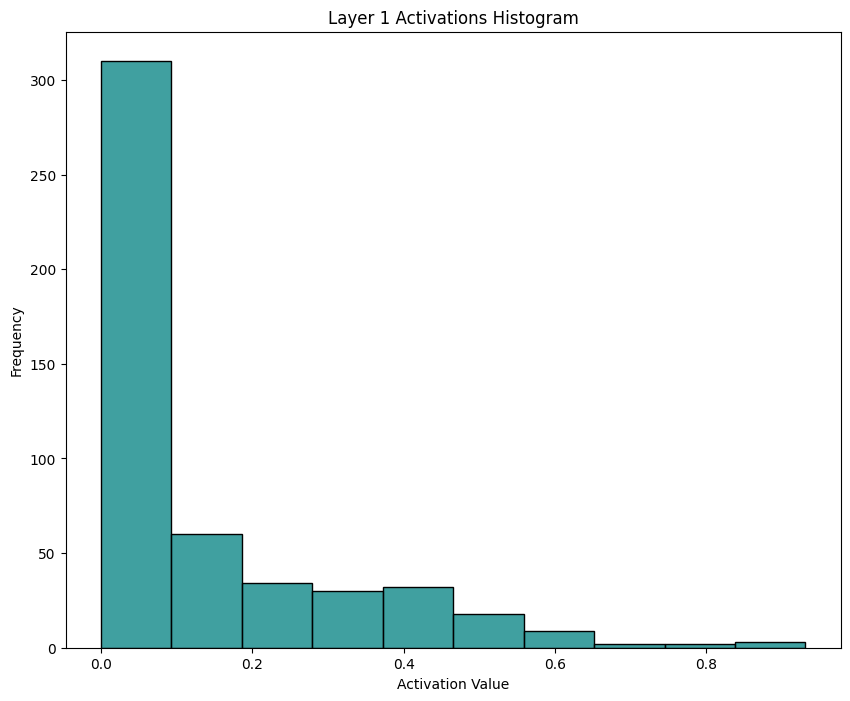

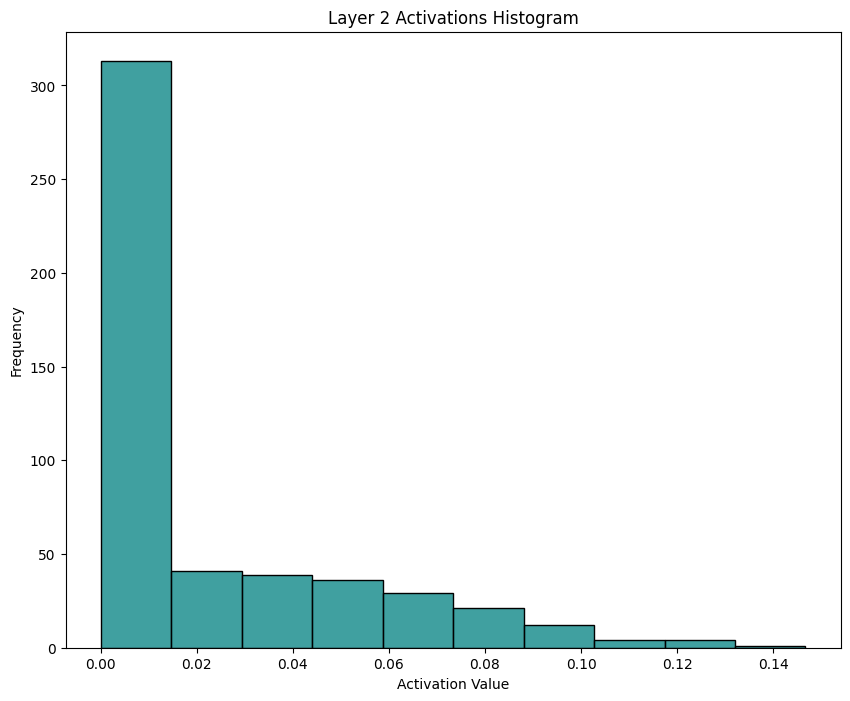

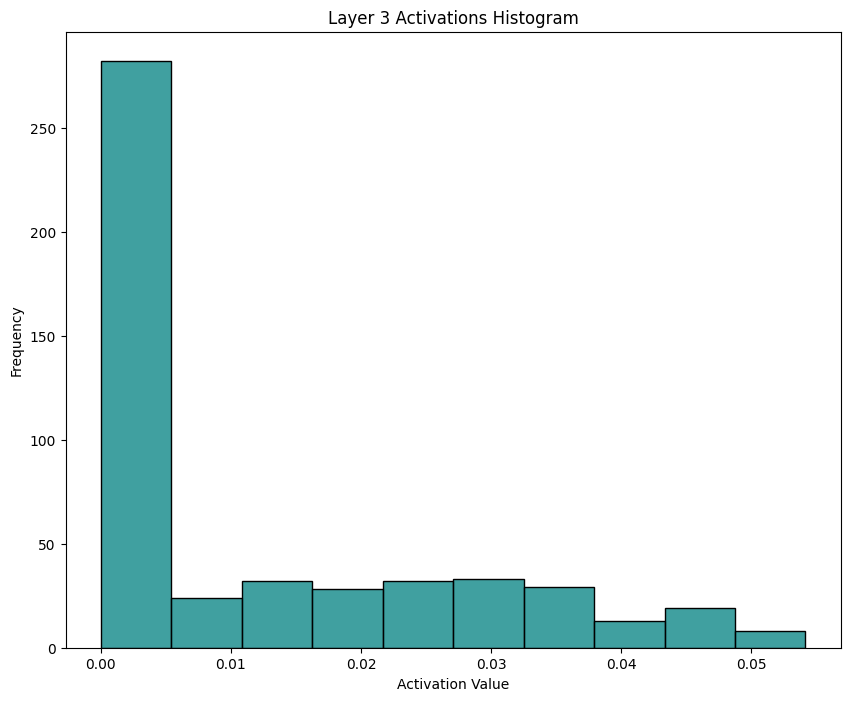

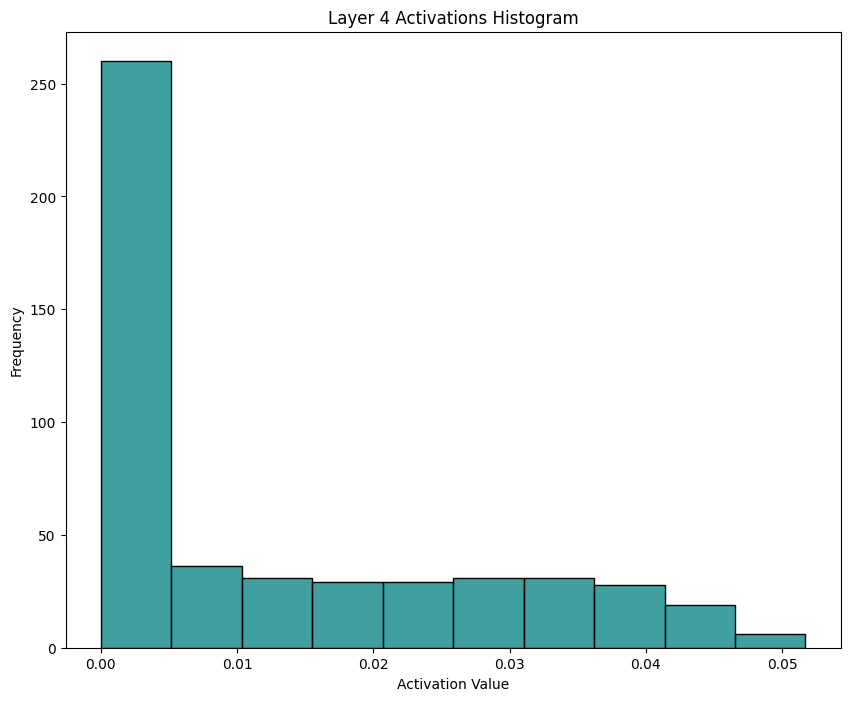

In [ ]:
for i, activation in enumerate(data3):
    # plt.figure()
    plt.figure(figsize=(10,8))
    sns.histplot(activation.detach().numpy().flatten(), bins=10,color='teal')
    plt.title(f"Layer {i} Activations Histogram")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

**Observation:** Since ReLu outputs 0 for all negative inputs and passes positive inputs unchanged,we see large number of activations near 0,corresponding to neurons with negative inputs that result in zero activations.Unlike sigmoid and tanh,we wont see saturation effect in relu.Also relu doesnot shift the mean as sigmoid did.Thus the histogram exhibit more uniform distribution around zero.However there is non smooth transistion at 0.

# **Question 4:**  For tanh,sigmoid and relu activations and weights from Gaussian with mean 0 and std 1

In [ ]:
# For tanh activation function with mean 0 and std=1 weight initialized
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(1000,500)
    self.fc2 = nn.Linear(500,500)
    self.fc3 = nn.Linear(500,500)
    self.fc4 = nn.Linear(500,500)
    init.normal_(self.fc1.weight,mean = 0,std =1)
    init.normal_(self.fc2.weight,mean = 0,std =1)
    init.normal_(self.fc3.weight,mean = 0,std =1)
    init.normal_(self.fc4.weight,mean = 0,std =1)
  def forward(self,x):
    x=self.flatten(x)
    data = []
    data.append(x)
    print(f"Layer 0 Activation: {x}")
    x= F.tanh(self.fc1(x))
    data.append(x)
    print(f"Layer 1 Activation: {x}")
    x = F.tanh(self.fc2(x))
    data.append(x)
    print(f"Layer 2 Activation: {x}")
    x= F.tanh(self.fc3(x))
    data.append(x)
    print(f"Layer 3 Activation: {x}")
    x = F.tanh(self.fc4(x))
    data.append(x)
    print(f"Layer 4 Activation: {x}")
    return x,data
model4 = NeuralNetwork()
print(model4)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data4 = model4(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

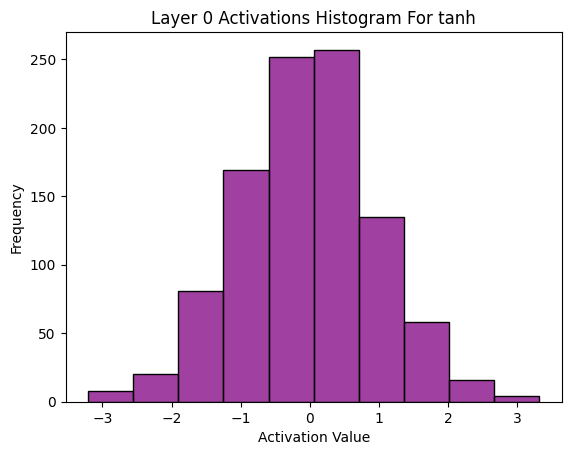

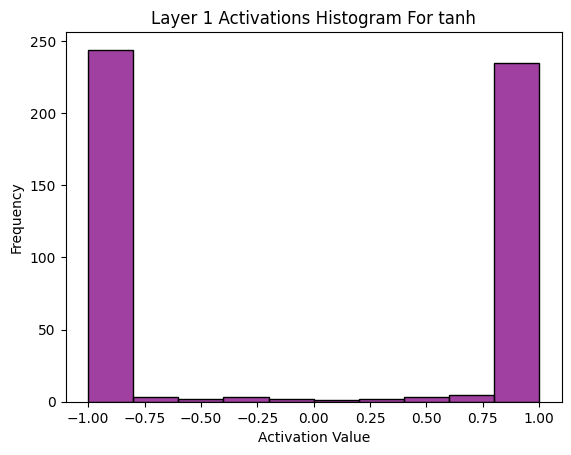

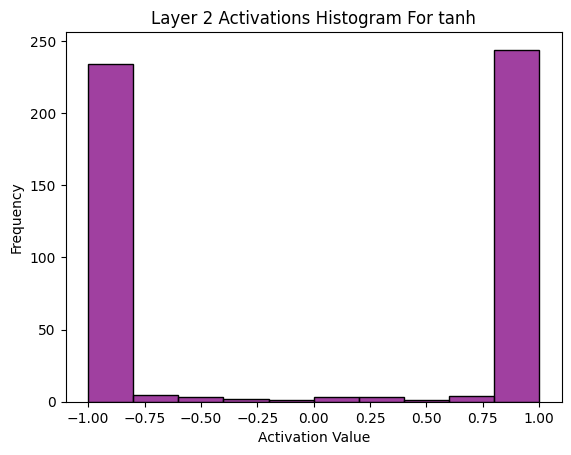

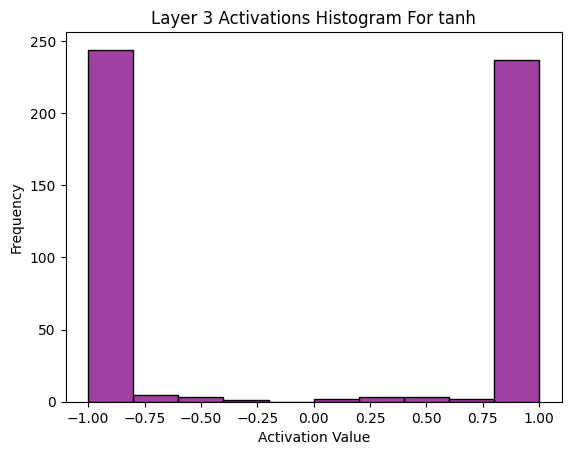

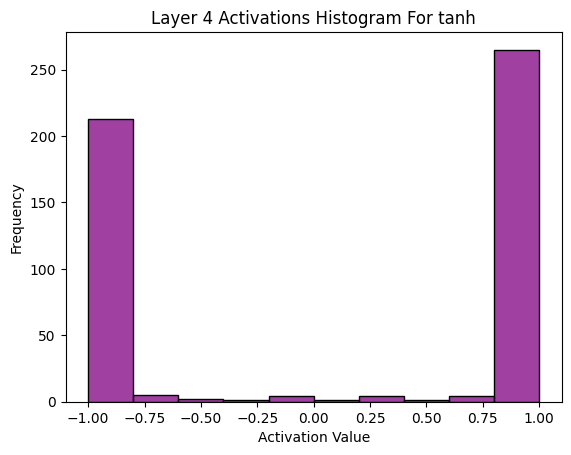

In [ ]:

for i, activation in enumerate(data4):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,color ='purple')
    plt.title(f"Layer {i} Activations Histogram For tanh")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

**Observation:** As the standard deviation is changed from 0.01 to 1 ,we see that tanh function saturates for large positive or negative inputs,mapping them to values close to +1 or -1 respectively.In each layer the activations are largely clustered near +1 or -1.However the activations would ve symmetric around 0,with tendency to saturate around extremes.This could also lead to Vanish Gradient Problem.

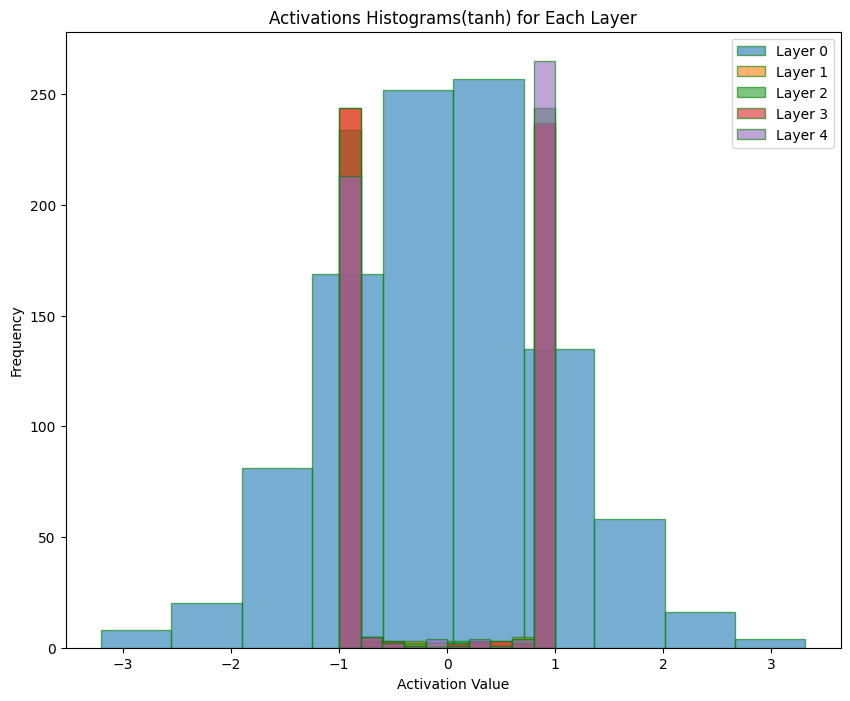

In [ ]:
plt.figure(figsize=(10,8))
for i, activation in enumerate(data4):
    plt.hist(activation.detach().numpy().flatten(), bins=10, alpha=0.6, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(tanh) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# For sigmoid activation function with mean 0 and std=1 weight initialized
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(1000,500)
    self.fc2 = nn.Linear(500,500)
    self.fc3 = nn.Linear(500,500)
    self.fc4 = nn.Linear(500,500)
    init.normal_(self.fc1.weight,mean = 0,std =1)
    init.normal_(self.fc2.weight,mean = 0,std =1)
    init.normal_(self.fc3.weight,mean = 0,std =1)
    init.normal_(self.fc4.weight,mean = 0,std =1)
  def forward(self,x):
    x=self.flatten(x)
    data = []
    data.append(x)
    print(f"Layer 0 Activation: {x}")
    x= F.sigmoid(self.fc1(x))
    data.append(x)
    print(f"Layer 1 Activation: {x}")
    x = F.sigmoid(self.fc2(x))
    data.append(x)
    print(f"Layer 2 Activation: {x}")
    x= F.sigmoid(self.fc3(x))
    data.append(x)
    print(f"Layer 3 Activation: {x}")
    x = F.sigmoid(self.fc4(x))
    data.append(x)
    print(f"Layer 4 Activation: {x}")
    return x,data

model5 = NeuralNetwork()
print(model5)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data5 = model5(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

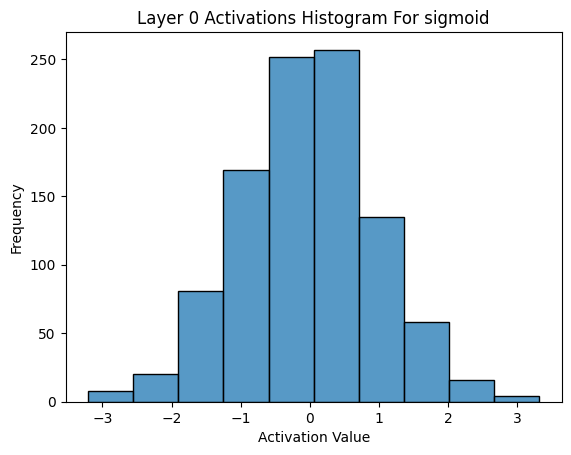

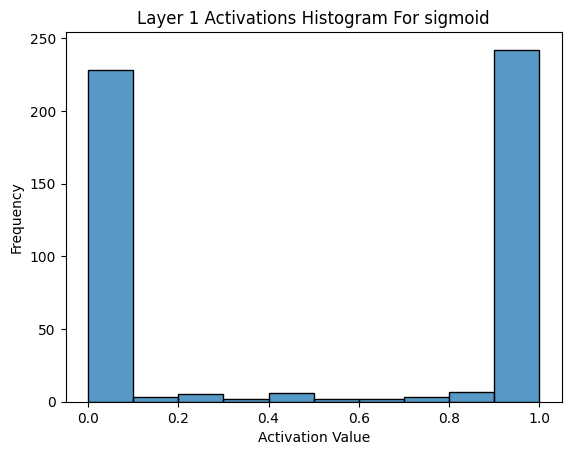

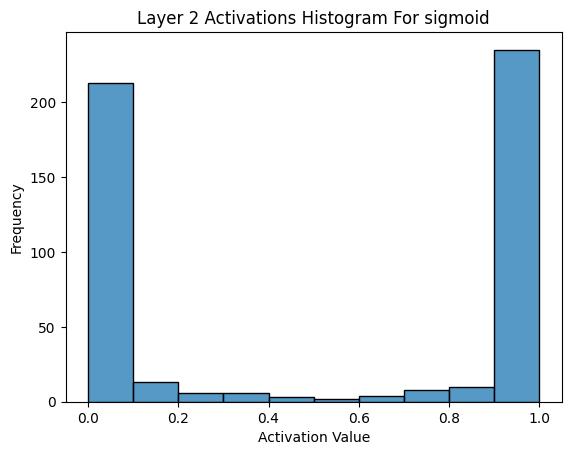

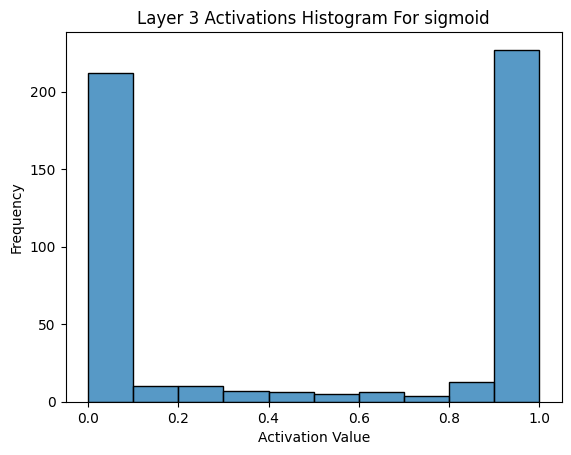

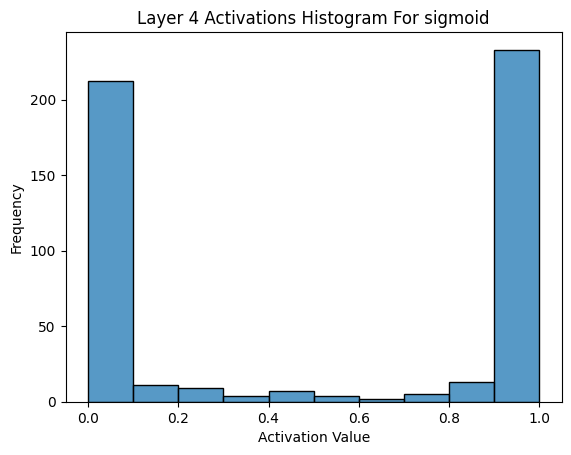

In [ ]:

for i, activation in enumerate(data5):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10)
    plt.title(f"Layer {i} Activations Histogram For sigmoid")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

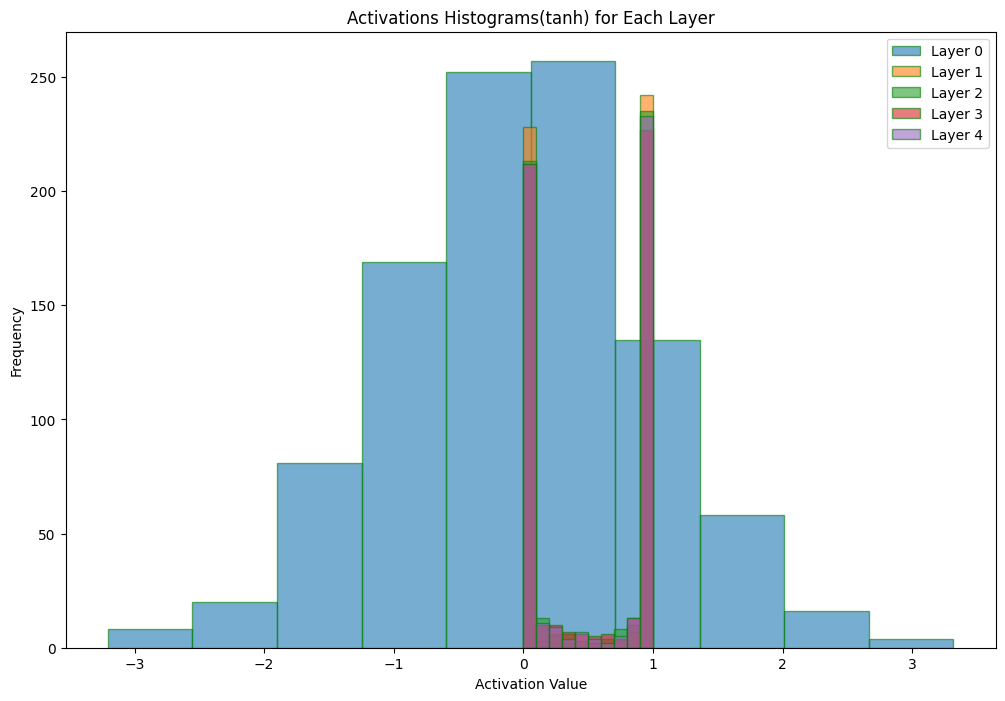

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data5):
    plt.hist(activation.detach().numpy().flatten(), bins=10, alpha=0.6, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(tanh) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation:**With this weight initialization ,the initial inputs of the sigmoid function falls within a range that leads to saturation,resulting in large number of activations clustered near 1 or 0.However the activations are distributed around the mean of 0.5 due to properties of sigmoid function.Also with this weight initialization it can still suffer from Vanishing Gradient Problem.

In [ ]:
# For ReLU activation function with mean 0 and std=1 weight initialized
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(1000,500)
    self.fc2 = nn.Linear(500,500)
    self.fc3 = nn.Linear(500,500)
    self.fc4 = nn.Linear(500,500)
    init.normal_(self.fc1.weight,mean = 0,std =1)
    init.normal_(self.fc2.weight,mean = 0,std =1)
    init.normal_(self.fc3.weight,mean = 0,std =1)
    init.normal_(self.fc4.weight,mean = 0,std =1)
  def forward(self,x):
    x=self.flatten(x)
    data = []
    data.append(x)
    print(f"Layer 0 Activation: {x}")
    x= F.relu(self.fc1(x))
    data.append(x)
    print(f"Layer 1 Activation: {x}")
    x = F.relu(self.fc2(x))
    data.append(x)
    print(f"Layer 2 Activation: {x}")
    x= F.relu(self.fc3(x))
    data.append(x)
    print(f"Layer 3 Activation: {x}")
    x = F.relu(self.fc4(x))
    data.append(x)
    print(f"Layer 4 Activation: {x}")
    return x,data

model6 = NeuralNetwork()
print(model6)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data6 = model6(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

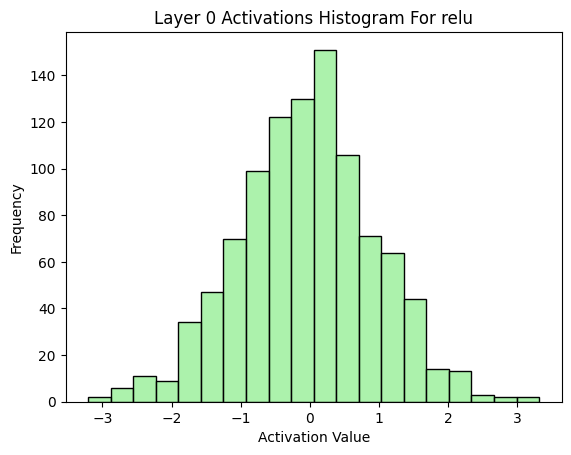

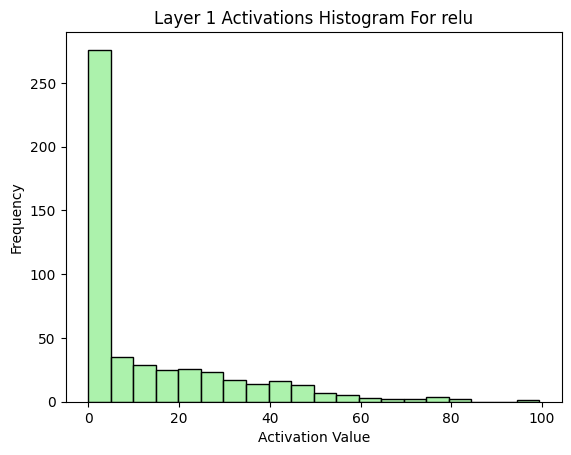

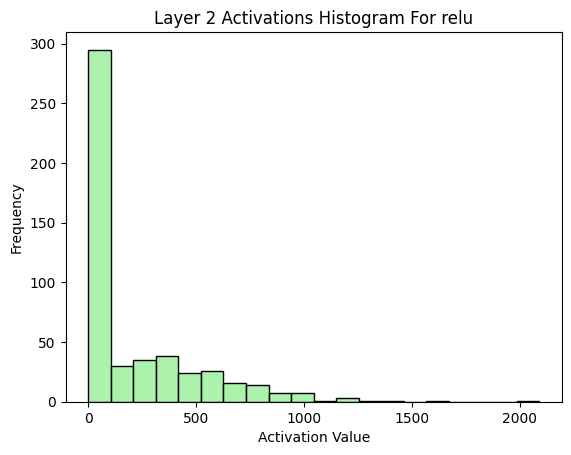

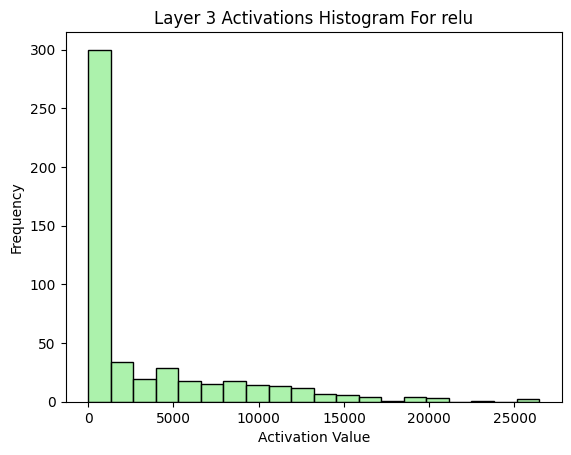

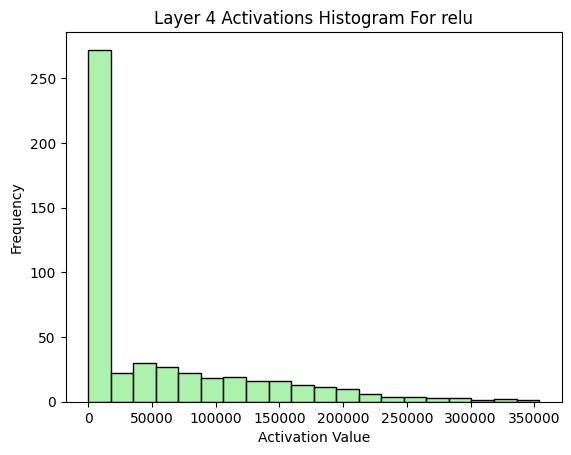

In [ ]:

for i, activation in enumerate(data6):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=20,color='lightgreen')
    plt.title(f"Layer {i} Activations Histogram For relu")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

**Observation:**Since for Relu outputs 0 for negative inputs and passes positive inputs unchanged.with these initialization the values are clustered near 0 which is due to negative inputs that resulted in zero activations.As this function doesnot saturate for positive inputs,the activations for positive inputs is not constrained to a specific range.Also the activations doesnot exhibit specific mean value due to the non saturation property of Relu.It doesnot suffer from Vanishing Gradient Problem but can lead to dying relu problem where the neurons get stuck in the zero activation state indefinitely.

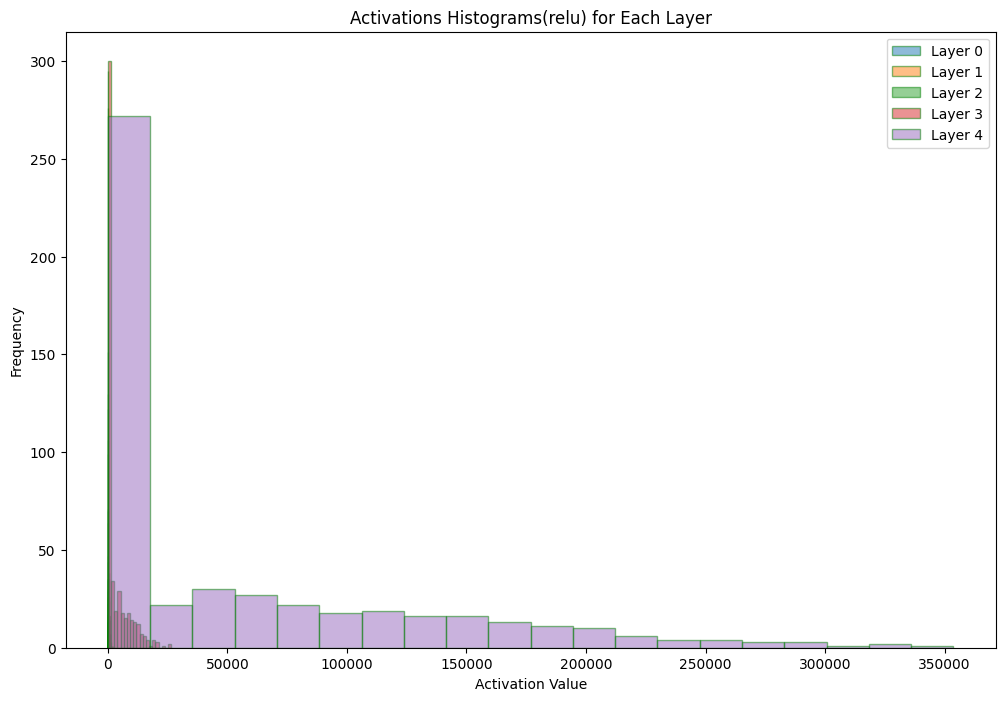

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data6):
    plt.hist(activation.detach().numpy().flatten(), bins=20, alpha=0.5, label=f"Layer {i}",edgecolor ="green")

plt.title("Activations Histograms(relu) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# **Question 5:**Using xavier weight initialization for tanh,sigmoid and relu activations

In [ ]:
#With xavier Intialization
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)

        # Xavier initialization for tanh activation
        init.xavier_normal_(self.fc1.weight, gain=nn.init.calculate_gain('tanh'))
        init.xavier_normal_(self.fc2.weight, gain=nn.init.calculate_gain('tanh'))
        init.xavier_normal_(self.fc3.weight, gain=nn.init.calculate_gain('tanh'))
        init.xavier_normal_(self.fc4.weight, gain=nn.init.calculate_gain('tanh'))

    def forward(self, x):
        x = self.flatten(x)
        data = []
        data.append(x)
        print(f"Layer 0 Activation: {x}")
        x = F.tanh(self.fc1(x))
        data.append(x)
        print(f"Layer 1 Activation: {x}")
        x = F.tanh(self.fc2(x))
        data.append(x)
        print(f"Layer 2 Activation: {x}")
        x = F.tanh(self.fc3(x))
        data.append(x)
        print(f"Layer 3 Activation: {x}")
        x = F.tanh(self.fc4(x))
        data.append(x)
        print(f"Layer 4 Activation: {x}")
        return x, data

model7 = NeuralNetwork()
print(model7)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data7 = model7(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

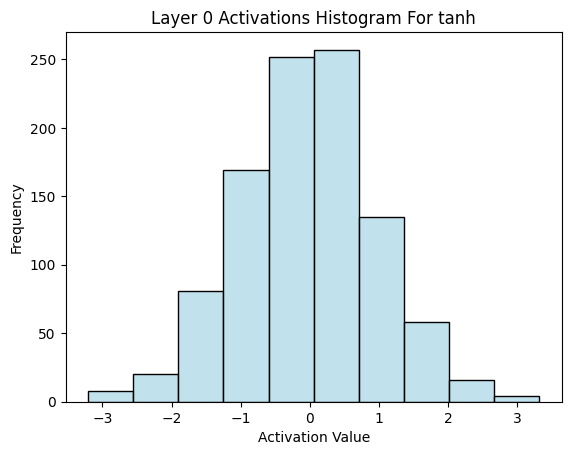

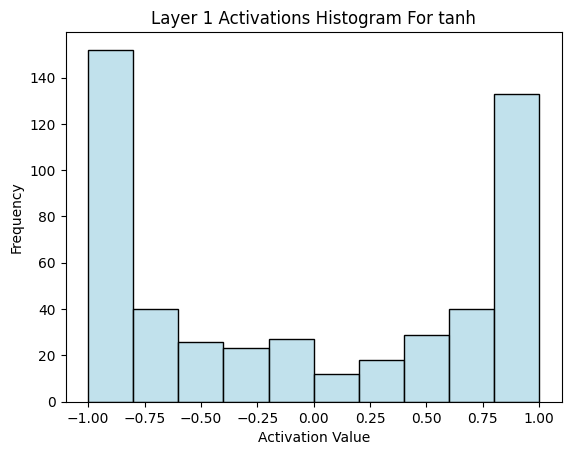

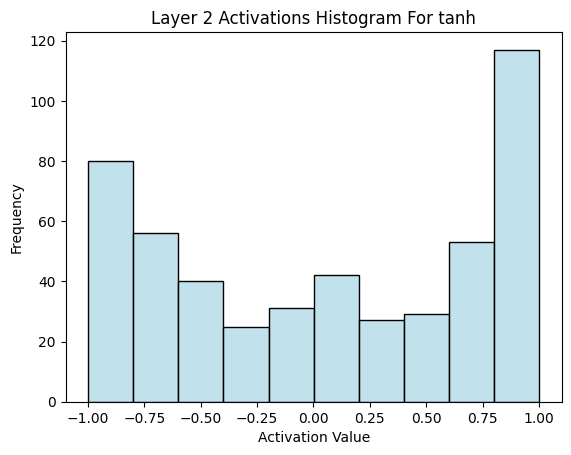

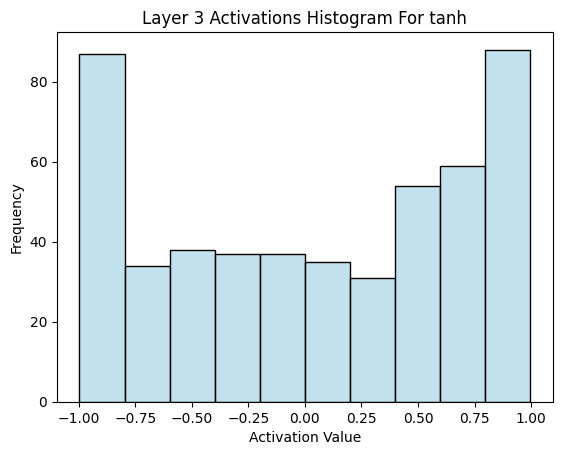

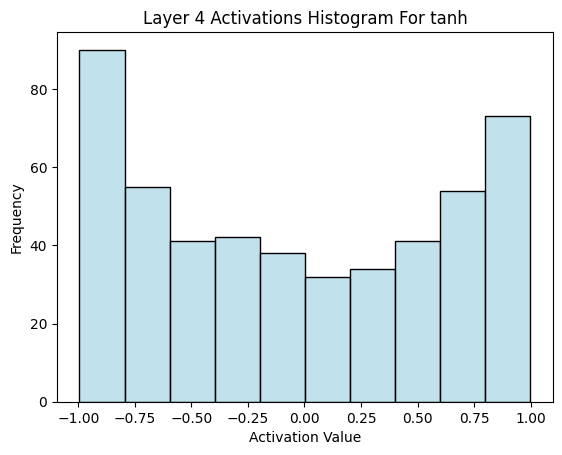

In [ ]:

for i, activation in enumerate(data7):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,color='lightblue')
    plt.title(f"Layer {i} Activations Histogram For tanh")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

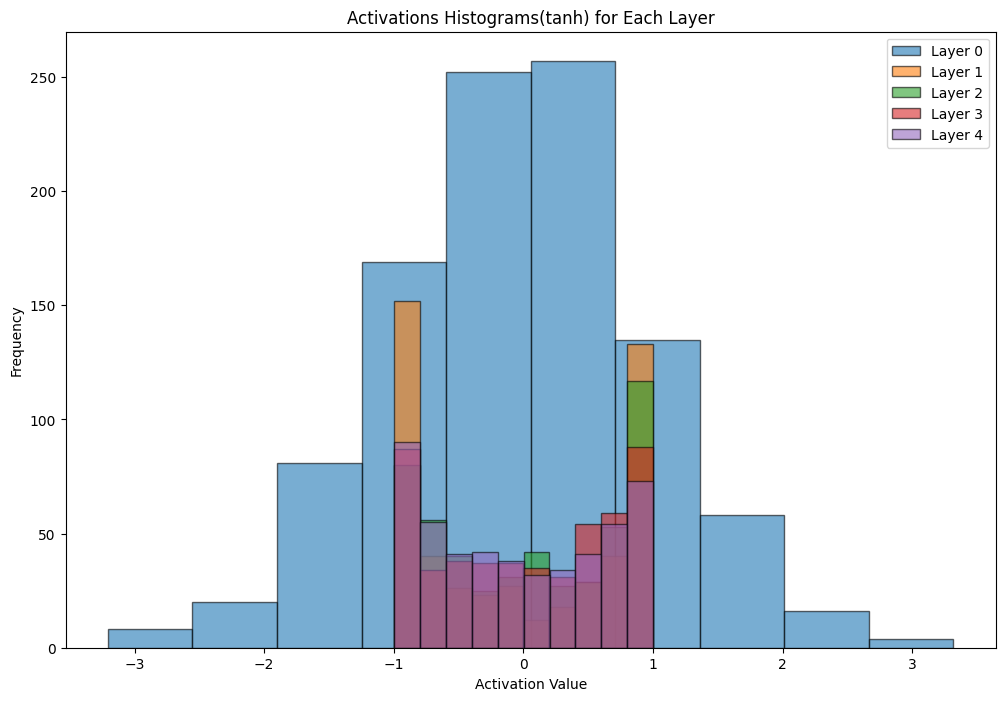

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data7):
    plt.hist(activation.detach().numpy().flatten(), bins=10, alpha=0.6, label=f"Layer {i}",edgecolor = "black")

plt.title("Activations Histograms(tanh) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation:** With Xavier initialization, the scale of the initial weights is adjusted based on the number of input and output units in a layer. This prevents saturation of the tanh function and mitigate the vanishing gradient problem.With tanh activation, we see that smoother gradients during training and potentially faster convergence compared to using mean=0 and std=1 initialization. Activation values are more  evenly distributed across the tanh function's range (-1 to 1), with less likelihood of saturation at the extremes.
Overall, Xavier initialization  improved the performance of tanh activation function by alleviating the vanishing gradient problem and promoting smoother training dynamics.

In [ ]:
#With xavier Intialization for sigmoid
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)

        # Xavier initialization for sigmoid activation
        init.xavier_normal_(self.fc1.weight, gain=nn.init.calculate_gain('sigmoid'))
        init.xavier_normal_(self.fc2.weight, gain=nn.init.calculate_gain('sigmoid'))
        init.xavier_normal_(self.fc3.weight, gain=nn.init.calculate_gain('sigmoid'))
        init.xavier_normal_(self.fc4.weight, gain=nn.init.calculate_gain('sigmoid'))

    def forward(self, x):
        x = self.flatten(x)
        data = []
        data.append(x)
        print(f"Layer 0 Activation: {x}")
        x = F.sigmoid(self.fc1(x))
        data.append(x)
        print(f"Layer 1 Activation: {x}")
        x = F.sigmoid(self.fc2(x))
        data.append(x)
        print(f"Layer 2 Activation: {x}")
        x = F.sigmoid(self.fc3(x))
        data.append(x)
        print(f"Layer 3 Activation: {x}")
        x = F.sigmoid(self.fc4(x))
        data.append(x)
        print(f"Layer 4 Activation: {x}")
        return x, data

model8 = NeuralNetwork()
print(model8)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data8 = model8(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

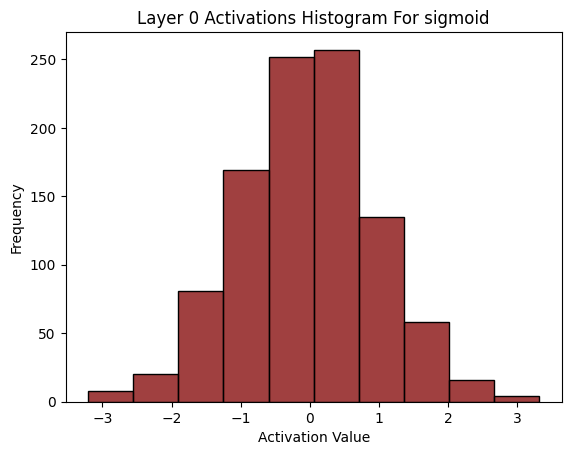

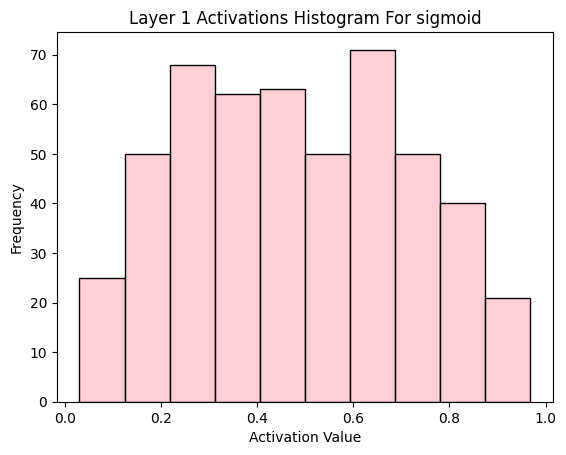

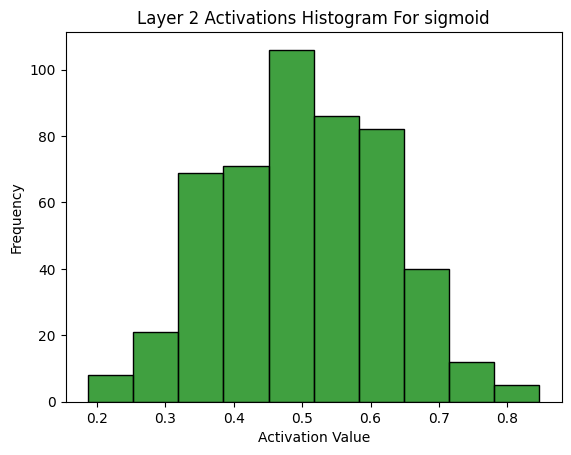

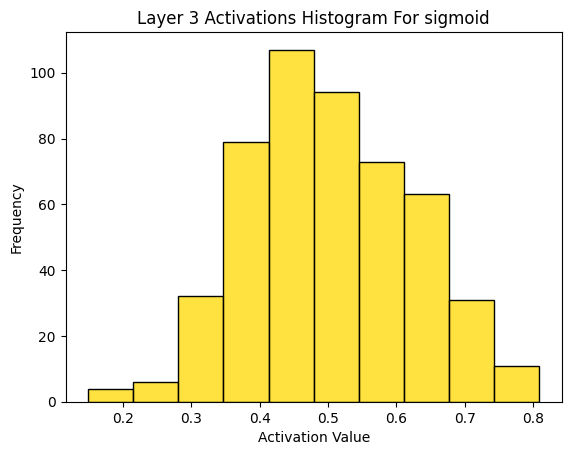

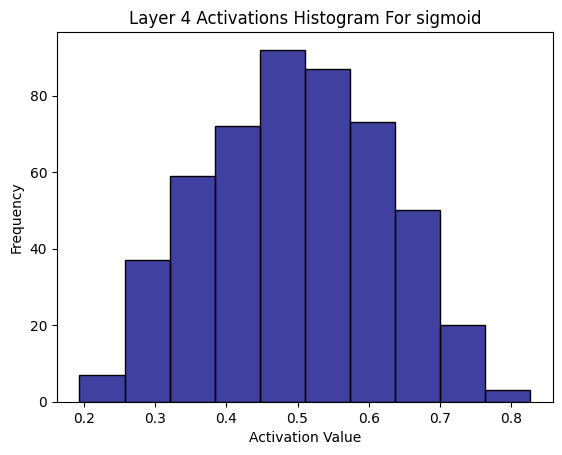

In [ ]:
color = ["maroon","pink","green","gold","navy"]
for i, activation in enumerate(data8):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,color=color[i])
    plt.title(f"Layer {i} Activations Histogram For sigmoid")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

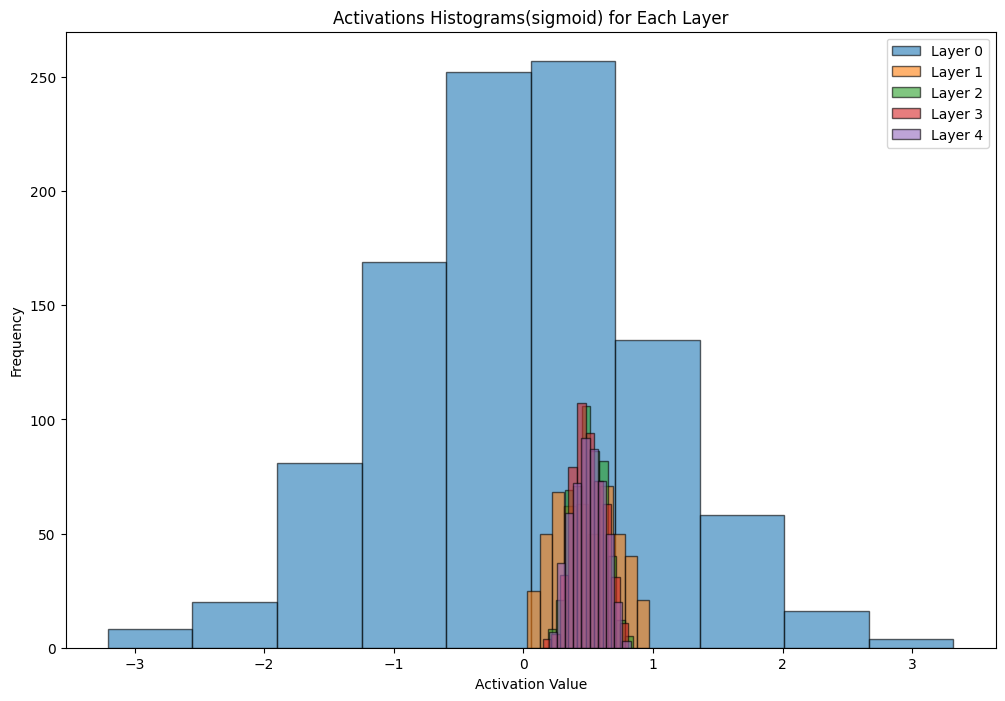

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data8):
    plt.hist(activation.detach().numpy().flatten(), bins=10, alpha=0.6, label=f"Layer {i}",edgecolor ="black")

plt.title("Activations Histograms(sigmoid) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation:**Xavier initialization aims to prevent saturation of the sigmoid function and ensure more stable gradients during training.
Activation values are distributed more evenly around the midpoint of the sigmoid function (0.5) compared to other initialization methods.
Histograms  showed activations concentrated around the midpoint, with a smoother distribution towards the extremes (0 and 1).
Also fewer activations saturated near the extremes of the sigmoid function's range, indicating improved utilization of the activation function's dynamic range.

In [ ]:
#With xavier Intialization for ReLU
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)

        # Xavier initialization for Relu activation
        init.xavier_normal_(self.fc1.weight, gain=nn.init.calculate_gain('relu'))
        init.xavier_normal_(self.fc2.weight, gain=nn.init.calculate_gain('relu'))
        init.xavier_normal_(self.fc3.weight, gain=nn.init.calculate_gain('relu'))
        init.xavier_normal_(self.fc4.weight, gain=nn.init.calculate_gain('relu'))

    def forward(self, x):
        x = self.flatten(x)
        data = []
        data.append(x)
        print(f"Layer 0 Activation: {x}")
        x = F.relu(self.fc1(x))
        data.append(x)
        print(f"Layer 1 Activation: {x}")
        x = F.relu(self.fc2(x))
        data.append(x)
        print(f"Layer 2 Activation: {x}")
        x = F.relu(self.fc3(x))
        data.append(x)
        print(f"Layer 3 Activation: {x}")
        x = self.fc4(x)
        data.append(x)
        print(f"Layer 4 Activation: {x}")
        return x, data

model9 = NeuralNetwork()
print(model9)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data9 = model9(input)

Layer 0 Activation: tensor([[-3.0368e-01,  1.0172e-01, -1.3792e-01, -4.1667e-01, -3.9080e-01,
         -4.2028e-02, -3.8311e-01, -9.5983e-01,  7.6235e-02, -1.0561e-01,
          5.3196e-01, -5.4489e-01, -7.9242e-01,  1.2621e+00, -2.1031e-01,
         -3.8611e-03, -6.7975e-01,  4.2337e-02, -2.0169e-01,  9.8114e-01,
          5.4531e-01,  8.7554e-01, -2.6486e-01, -1.5796e+00,  3.5006e-01,
          5.1029e-01,  2.2938e-01,  1.1100e+00,  1.4605e+00, -3.6488e-01,
         -3.5181e-01,  1.7562e-01, -7.9584e-01, -2.4062e+00, -1.6031e-01,
          8.3451e-01, -1.3474e-01,  2.7478e-01,  4.6004e-01,  2.9029e-01,
         -1.2813e+00,  1.0050e+00,  1.3793e-01,  1.6434e-01,  1.2477e+00,
         -8.2257e-01,  3.0028e-01, -1.0035e+00, -1.1390e+00,  9.1428e-02,
         -5.2910e-01, -5.5695e-01,  7.2542e-01, -1.1081e+00,  3.9210e-01,
          1.4395e+00,  6.5531e-01, -1.5568e-01,  4.7007e-01,  1.2113e+00,
         -8.1191e-01,  3.6670e-01, -8.1626e-01,  7.4452e-01, -5.9801e-01,
         -2.4857e+

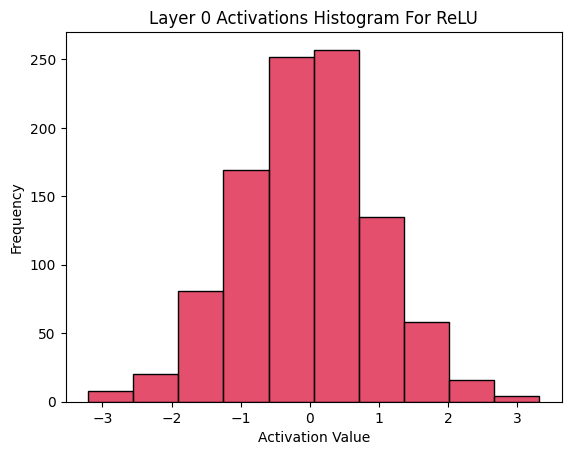

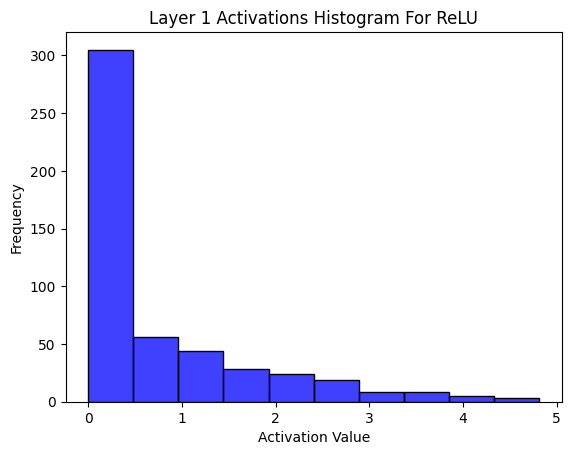

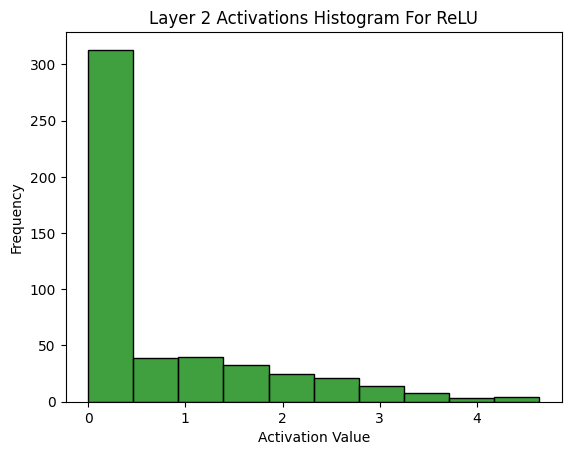

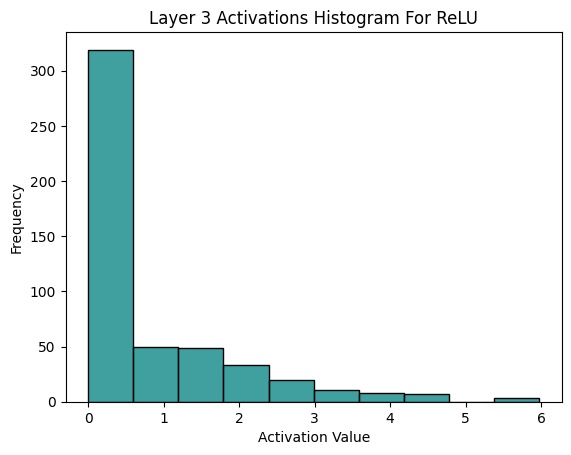

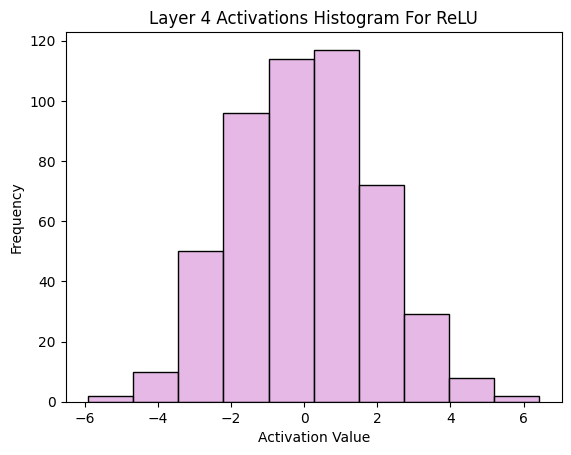

In [ ]:
color = ["crimson","blue","green","teal","plum"]
for i, activation in enumerate(data9):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,color=color[i])
    plt.title(f"Layer {i} Activations Histogram For ReLU")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

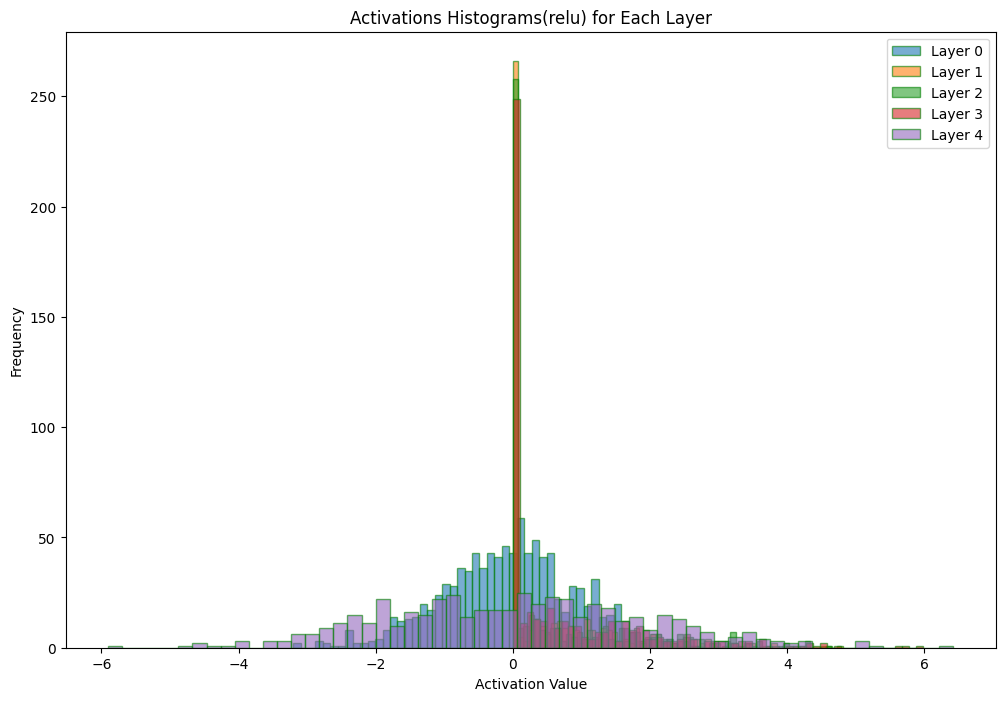

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data9):
    plt.hist(activation.detach().numpy().flatten(), bins=60, alpha=0.6, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(relu) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Observation: Xavier initialization helps prevent "dying ReLU" by ensuring that initial weights are not too large, promoting more balanced activations across positive and negative values.
Histograms  showed significant portion of activations clustered near zero due to the ReLU's threshold at zero, but with a smoother distribution compared to other initialization methods.
ALso histograms with a larger number of activations distributed towards positive values, indicating more neurons with active responses.
And there also occurs  dead neurons (neurons outputting zero activations) compared to other weight initialization schemes, leading to more efficient network training.


# **Question 6:** With He weight initialization on tanh,sigmoid and relu activations




In [ ]:
#With He Intialization
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)

        # He initialization for tanh activation
        init.kaiming_normal_(self.fc1.weight, mode = 'fan_in',nonlinearity = 'tanh')
        init.kaiming_normal_(self.fc2.weight, mode = 'fan_in',nonlinearity = 'tanh')
        init.kaiming_normal_(self.fc3.weight, mode = 'fan_in',nonlinearity = 'tanh')
        init.kaiming_normal_(self.fc4.weight, mode = 'fan_in',nonlinearity = 'tanh')

    def forward(self, x):
        x = self.flatten(x)
        data = []
        data.append(x)
        print(f"Layer 0 Activation: {x}")
        x = F.tanh(self.fc1(x))
        data.append(x)
        print(f"Layer 1 Activation: {x}")
        x = F.tanh(self.fc2(x))
        data.append(x)
        print(f"Layer 2 Activation: {x}")
        x = F.tanh(self.fc3(x))
        data.append(x)
        print(f"Layer 3 Activation: {x}")
        x = F.tanh(self.fc4(x))
        data.append(x)
        print(f"Layer 4 Activation: {x}")
        return x, data

model10 = NeuralNetwork()
print(model10)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:
input = torch.randn(1,1000)
output,data10 = model10(input)

Layer 0 Activation: tensor([[-3.3406e-01, -9.4080e-01,  9.5201e-01,  1.1424e+00,  1.9280e-01,
         -8.0290e-01, -5.2312e-01,  2.2438e-02,  1.7526e+00, -1.0305e+00,
         -3.4722e-01,  5.8844e-01, -1.7323e-01,  4.1786e-01, -5.9768e-01,
         -1.0212e-01, -9.9041e-02, -8.3201e-01, -5.9692e-01,  1.0616e+00,
          2.0236e+00,  5.5545e-01,  7.2670e-01, -1.6742e+00, -6.5433e-02,
         -7.8004e-01,  3.6704e-01, -1.0688e+00,  6.3152e-01, -1.0968e+00,
         -3.7114e-02,  2.0868e+00, -3.9133e-01,  4.0225e-01, -1.8943e-02,
          5.7365e-01,  4.6550e-01, -3.6027e-01,  1.0127e+00,  3.4123e-01,
          2.5737e-02, -2.6353e+00,  9.2101e-01, -7.5950e-01, -6.3821e-01,
         -3.0990e-01,  1.1201e-01,  3.7418e-01,  1.4691e+00,  1.8170e+00,
         -5.6075e-01, -2.6334e-01,  6.6168e-01, -3.7058e-01,  1.3166e-01,
          1.8666e+00,  7.4204e-01, -9.6577e-02,  1.1108e+00,  1.6379e-01,
         -1.3176e-02,  7.4147e-01, -1.2077e-01,  2.7011e-01,  1.0429e+00,
         -6.3768e-

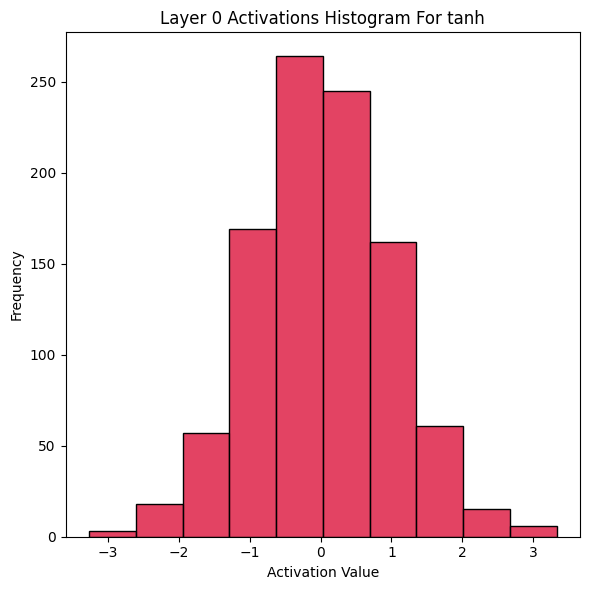

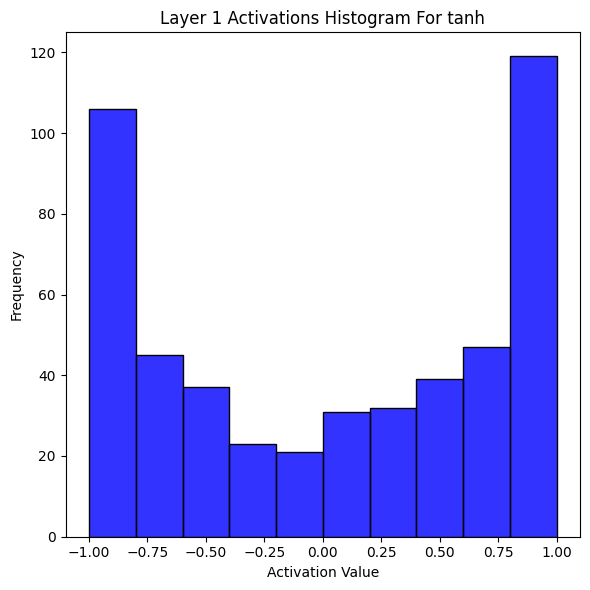

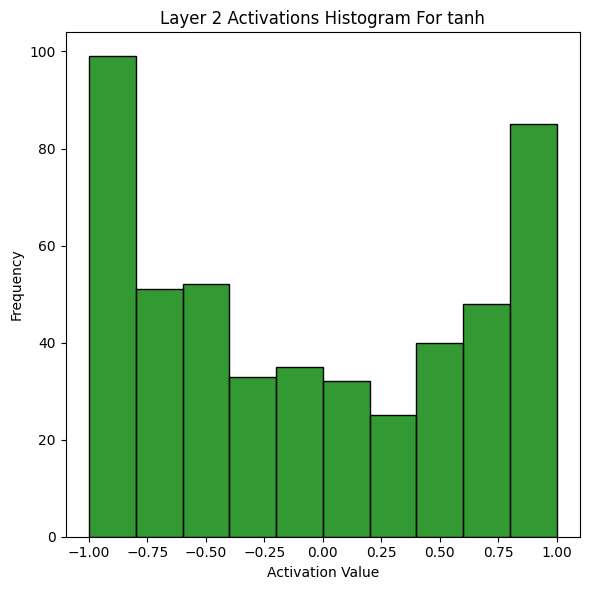

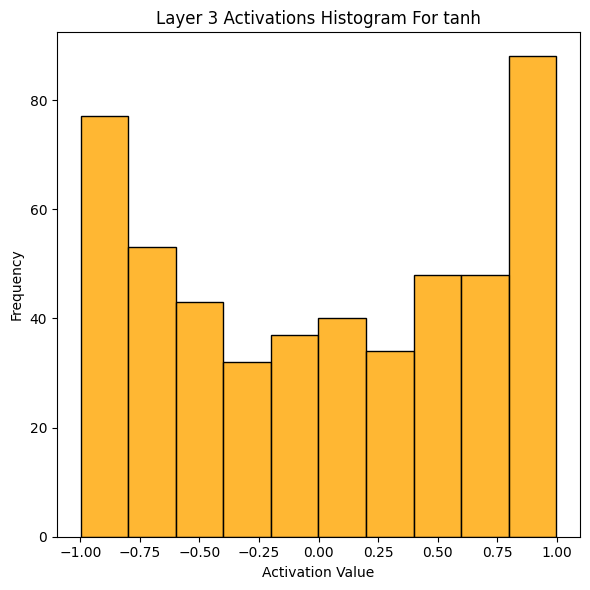

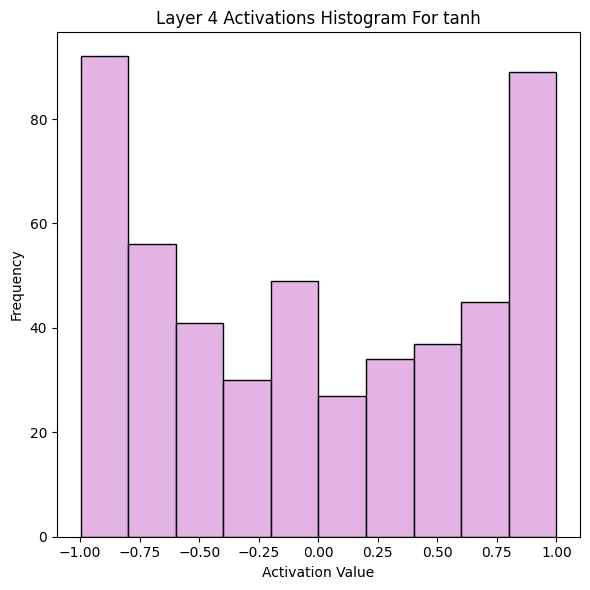

In [ ]:

color = ["crimson","blue","green","orange","plum"]
for i, activation in enumerate(data10):
    # plt.figure()
    plt.figure(figsize=(6,6))
    sns.histplot(activation.detach().numpy().flatten(), bins=10,alpha=0.8,color=color[i])
    plt.title(f"Layer {i} Activations Histogram For tanh")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    # plt.legend()
    plt.show()

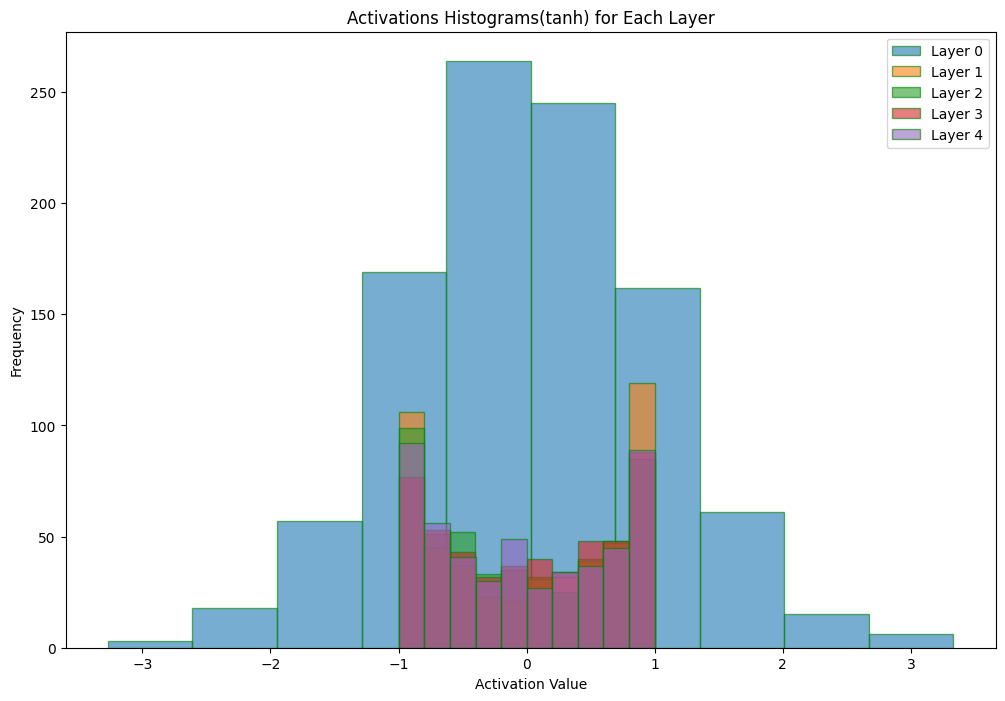

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data10):
    plt.hist(activation.detach().numpy().flatten(), bins=10, alpha=0.6, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(tanh) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation:**He initialization scales the initial weights based on the number of input units in the layer. It helps to prevent saturation of the tanh function and promote more stable gradients during training.
Activation values are distributed more evenly across the range of the tanh function (-1 to 1) compared to other weight initialization schemes.
Histograms shows activations concentrated around zero, with a smoother transition towards the extremes (-1 and 1).
Also fewer activations saturated near the extremes of the tanh function's range, indicating more balanced activations throughout the network.

In [ ]:
#With He Intialization for sigmoid
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)

        # He initialization for sigmoid activation
        # gain = init.calculate_gain('sigmoid')
        init.kaiming_normal_(self.fc1.weight, mode = 'fan_in',nonlinearity = 'sigmoid')
        init.kaiming_normal_(self.fc2.weight, mode = 'fan_in',nonlinearity = 'sigmoid')
        init.kaiming_normal_(self.fc3.weight, mode = 'fan_in',nonlinearity = 'sigmoid')
        init.kaiming_normal_(self.fc4.weight, mode = 'fan_in',nonlinearity = 'sigmoid')

    def forward(self, x):
        x = self.flatten(x)
        data = []
        data.append(x)
        print(f"Layer 0 Activation: {x}")
        x = F.sigmoid(self.fc1(x))
        data.append(x)
        print(f"Layer 1 Activation: {x}")
        x = F.sigmoid(self.fc2(x))
        data.append(x)
        print(f"Layer 2 Activation: {x}")
        x = F.sigmoid(self.fc3(x))
        data.append(x)
        print(f"Layer 3 Activation: {x}")
        x = F.sigmoid(self.fc4(x))
        data.append(x)
        print(f"Layer 4 Activation: {x}")
        return x, data

model11 = NeuralNetwork()
print(model11)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data11 = model11(input)

Layer 0 Activation: tensor([[-3.3406e-01, -9.4080e-01,  9.5201e-01,  1.1424e+00,  1.9280e-01,
         -8.0290e-01, -5.2312e-01,  2.2438e-02,  1.7526e+00, -1.0305e+00,
         -3.4722e-01,  5.8844e-01, -1.7323e-01,  4.1786e-01, -5.9768e-01,
         -1.0212e-01, -9.9041e-02, -8.3201e-01, -5.9692e-01,  1.0616e+00,
          2.0236e+00,  5.5545e-01,  7.2670e-01, -1.6742e+00, -6.5433e-02,
         -7.8004e-01,  3.6704e-01, -1.0688e+00,  6.3152e-01, -1.0968e+00,
         -3.7114e-02,  2.0868e+00, -3.9133e-01,  4.0225e-01, -1.8943e-02,
          5.7365e-01,  4.6550e-01, -3.6027e-01,  1.0127e+00,  3.4123e-01,
          2.5737e-02, -2.6353e+00,  9.2101e-01, -7.5950e-01, -6.3821e-01,
         -3.0990e-01,  1.1201e-01,  3.7418e-01,  1.4691e+00,  1.8170e+00,
         -5.6075e-01, -2.6334e-01,  6.6168e-01, -3.7058e-01,  1.3166e-01,
          1.8666e+00,  7.4204e-01, -9.6577e-02,  1.1108e+00,  1.6379e-01,
         -1.3176e-02,  7.4147e-01, -1.2077e-01,  2.7011e-01,  1.0429e+00,
         -6.3768e-

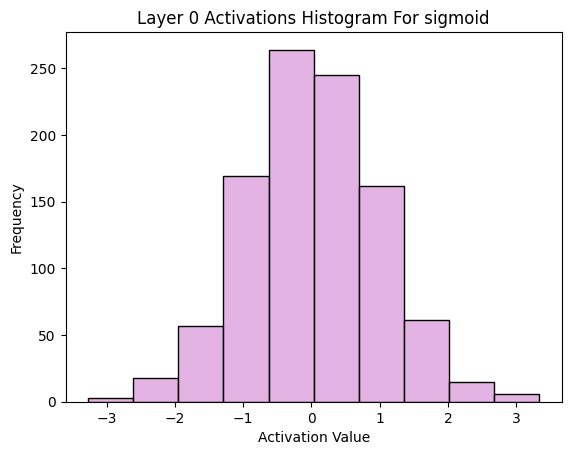

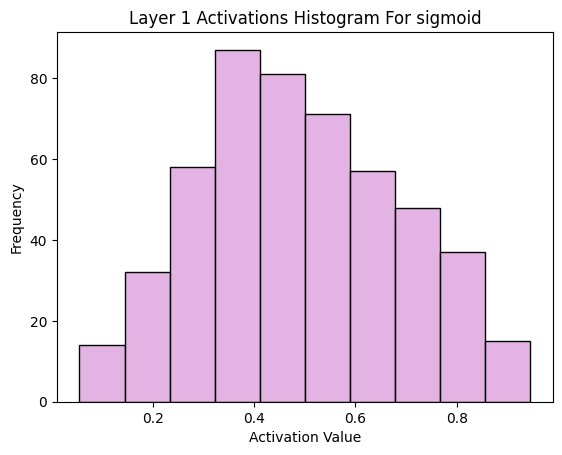

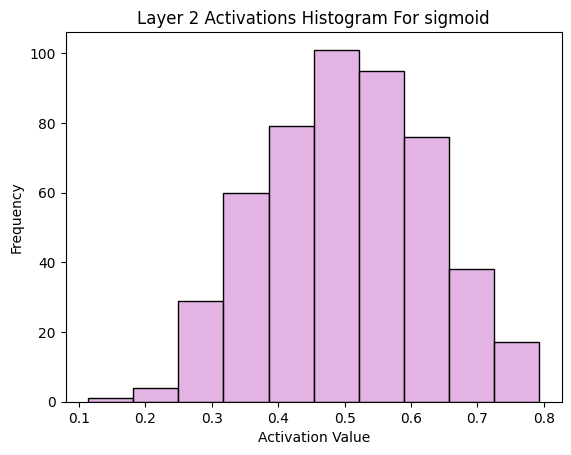

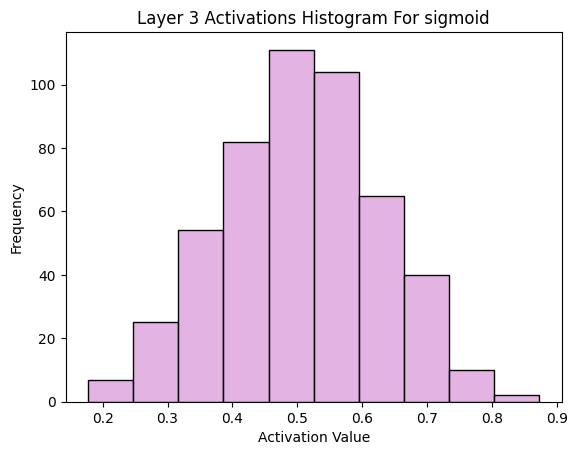

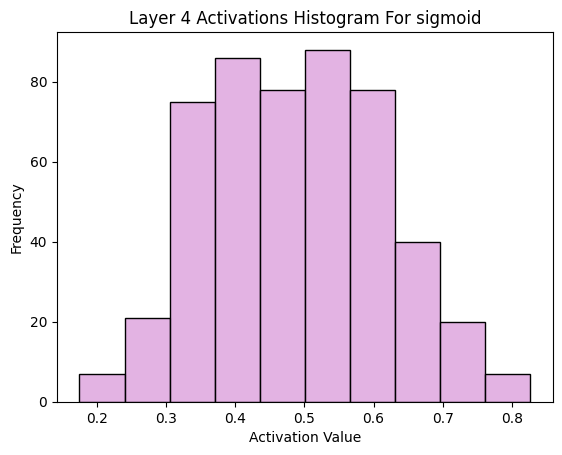

In [ ]:

for i, activation in enumerate(data11):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,alpha=0.8,color='plum')
    plt.title(f"Layer {i} Activations Histogram For sigmoid")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

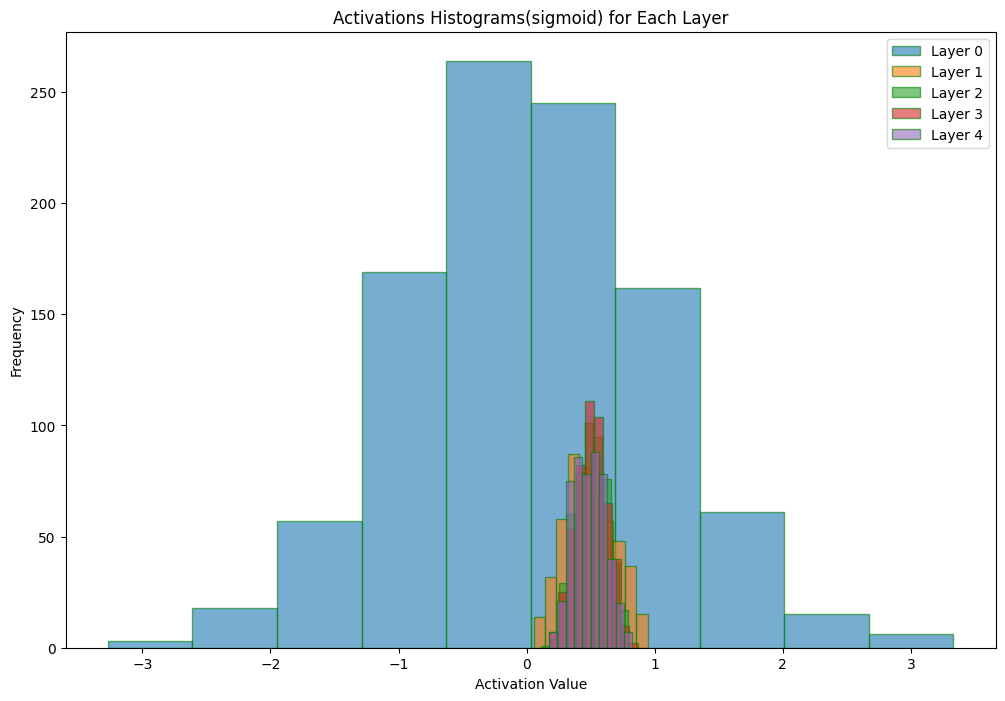

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data11):
    plt.hist(activation.detach().numpy().flatten(), bins=10, alpha=0.6, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(sigmoid) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Observation:He initialization aims to prevent saturation of the sigmoid function and ensure more stable gradients during training.
Activation values are distributed more evenly around the midpoint of the sigmoid function (0.5) compared to other initialization methods.
Histograms showed activations concentrated around the midpoint, with a smoother distribution towards the extremes (0 and 1).
Also fewer activations saturated near the extremes of the sigmoid function's range, indicating improved utilization of the activation function's dynamic range.

In [ ]:
#With He Intialization for ReLU
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)

        # He initialization for Relu activation
        init.kaiming_normal_(self.fc1.weight,mode = 'fan_in',nonlinearity = 'relu' )
        init.kaiming_normal_(self.fc2.weight,mode = 'fan_in',nonlinearity = 'relu' )
        init.kaiming_normal_(self.fc3.weight,mode = 'fan_in',nonlinearity = 'relu' )
        init.kaiming_normal_(self.fc4.weight,mode = 'fan_in',nonlinearity = 'relu' )

    def forward(self, x):
        x = self.flatten(x)
        data = []
        data.append(x)
        print(f"Layer 0 Activation: {x}")
        x = F.relu(self.fc1(x))
        data.append(x)
        print(f"Layer 1 Activation: {x}")
        x = F.relu(self.fc2(x))
        data.append(x)
        print(f"Layer 2 Activation: {x}")
        x = F.relu(self.fc3(x))
        data.append(x)
        print(f"Layer 3 Activation: {x}")
        x = F.relu(self.fc4(x))
        data.append(x)
        print(f"Layer 4 Activation: {x}")
        return x, data

model12 = NeuralNetwork()
print(model12)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=500, bias=True)
)


In [ ]:

output,data12 = model12(input)

Layer 0 Activation: tensor([[-3.3406e-01, -9.4080e-01,  9.5201e-01,  1.1424e+00,  1.9280e-01,
         -8.0290e-01, -5.2312e-01,  2.2438e-02,  1.7526e+00, -1.0305e+00,
         -3.4722e-01,  5.8844e-01, -1.7323e-01,  4.1786e-01, -5.9768e-01,
         -1.0212e-01, -9.9041e-02, -8.3201e-01, -5.9692e-01,  1.0616e+00,
          2.0236e+00,  5.5545e-01,  7.2670e-01, -1.6742e+00, -6.5433e-02,
         -7.8004e-01,  3.6704e-01, -1.0688e+00,  6.3152e-01, -1.0968e+00,
         -3.7114e-02,  2.0868e+00, -3.9133e-01,  4.0225e-01, -1.8943e-02,
          5.7365e-01,  4.6550e-01, -3.6027e-01,  1.0127e+00,  3.4123e-01,
          2.5737e-02, -2.6353e+00,  9.2101e-01, -7.5950e-01, -6.3821e-01,
         -3.0990e-01,  1.1201e-01,  3.7418e-01,  1.4691e+00,  1.8170e+00,
         -5.6075e-01, -2.6334e-01,  6.6168e-01, -3.7058e-01,  1.3166e-01,
          1.8666e+00,  7.4204e-01, -9.6577e-02,  1.1108e+00,  1.6379e-01,
         -1.3176e-02,  7.4147e-01, -1.2077e-01,  2.7011e-01,  1.0429e+00,
         -6.3768e-

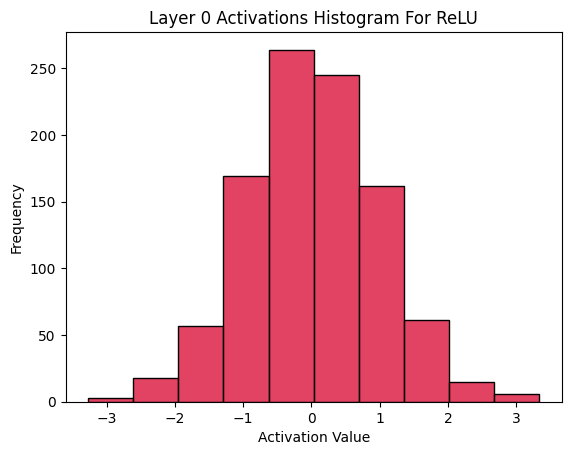

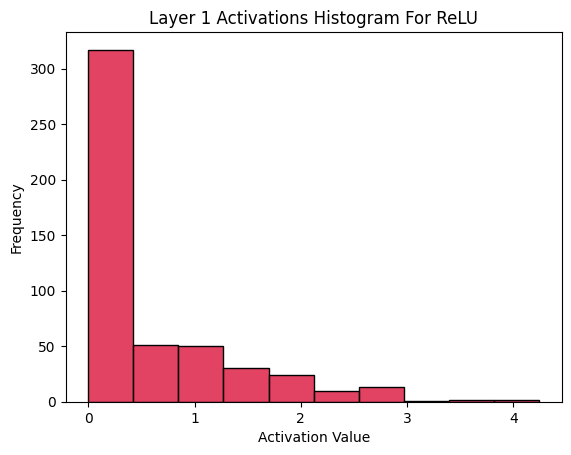

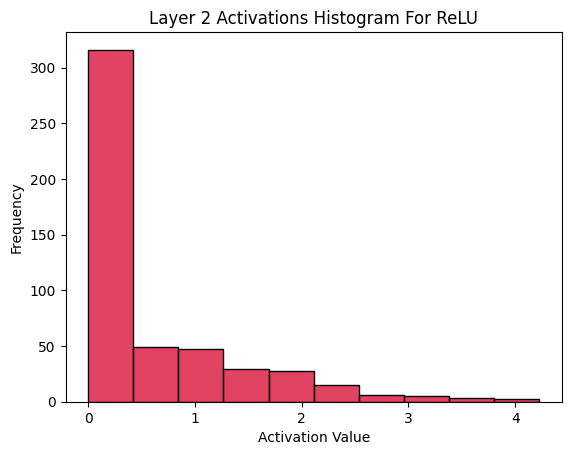

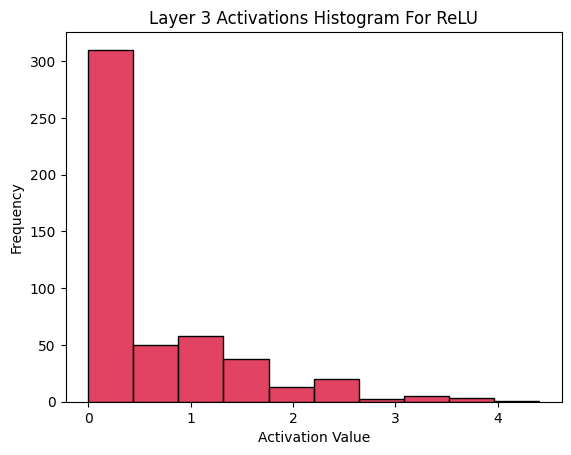

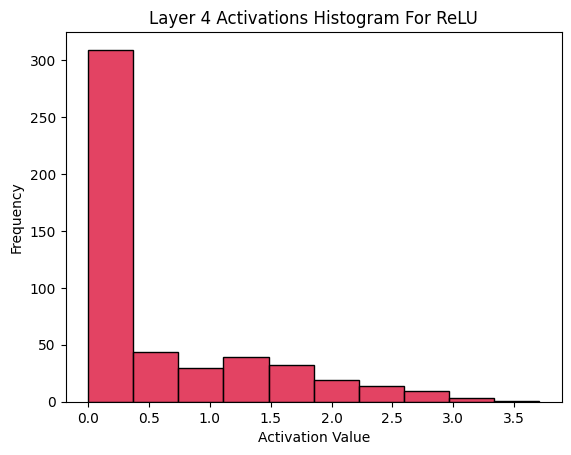

In [ ]:

for i, activation in enumerate(data12):
    plt.figure()
    sns.histplot(activation.detach().numpy().flatten(), bins=10,alpha=0.8,color='crimson')
    plt.title(f"Layer {i} Activations Histogram For ReLU")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    # plt.legend()
    plt.show()

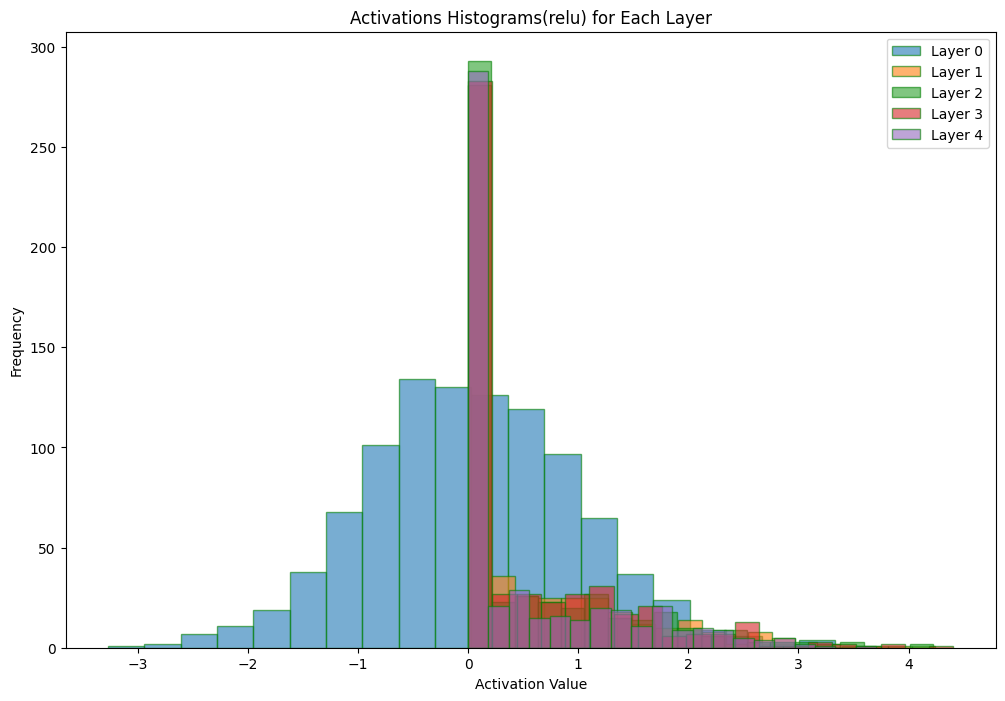

In [ ]:
plt.figure(figsize=(12,8))
for i, activation in enumerate(data12):
    plt.hist(activation.detach().numpy().flatten(), bins=20, alpha=0.6, label=f"Layer {i}",edgecolor="green")

plt.title("Activations Histograms(relu) for Each Layer")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

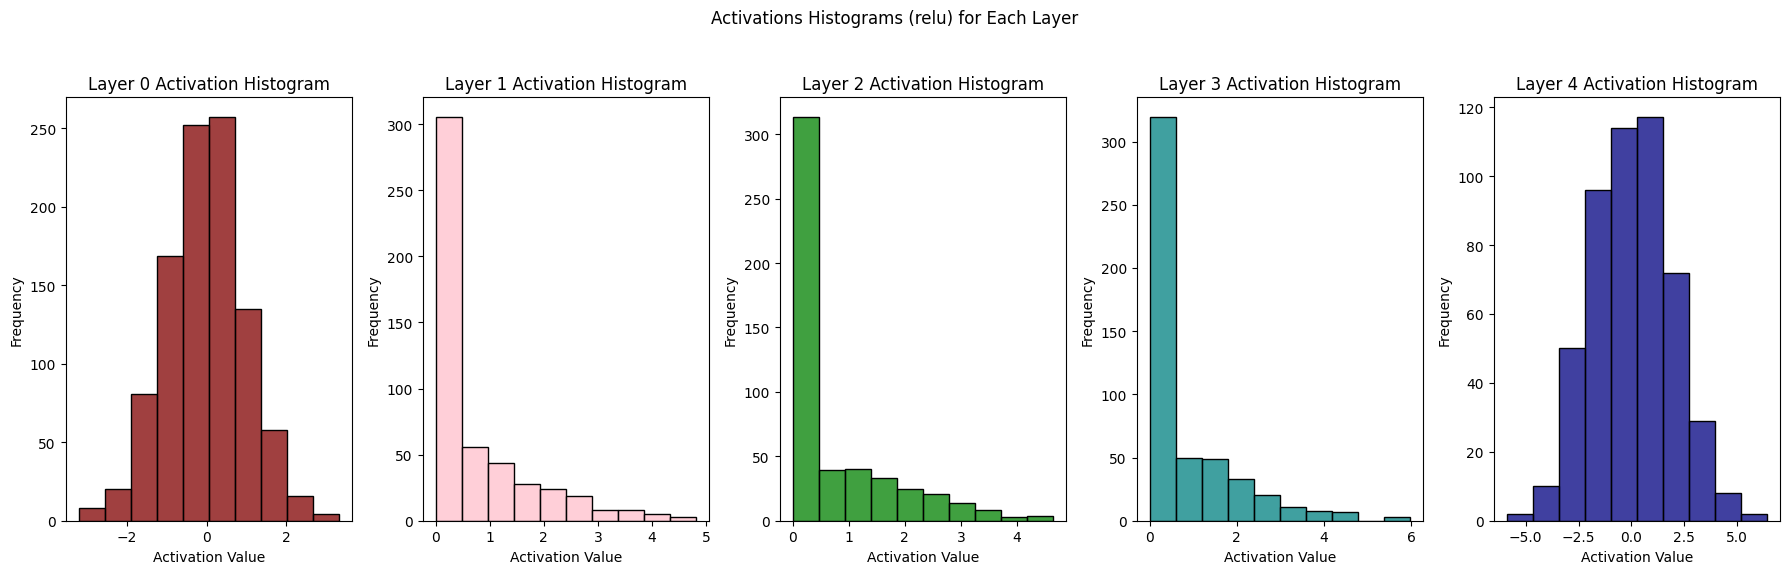

In [ ]:

color_palette = ["maroon", "pink", "green", "teal", "navy"]

fig, axes = plt.subplots(nrows=1, ncols=len(data9), figsize=(18, 6))

for i, (activation, ax) in enumerate(zip(data9, axes)):
    sns.histplot(activation.detach().numpy().flatten(), bins=10, color=color_palette[i], ax=ax)
    ax.set_title(f"Layer {i} Activation Histogram")
    ax.set_xlabel("Activation Value")
    ax.set_ylabel("Frequency")

plt.suptitle("Activations Histograms (relu) for Each Layer")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Observation:
He initialization helps prevent "dying ReLU" by scaling the initial weights based on the number of input units in the layer, promoting more balanced activations across positive and negative values.
Histograms showed significant portion of activations clustered near zero due to the ReLU's threshold at zero, but with a smoother distribution compared to other initialization methods.
We  observe histograms with a larger number of activations distributed towards positive values, indicating more neurons with active responses.
Also fewer occurrences of dead neurons (neurons outputting zero activations) compared to other weight initialization schemes, leading to more efficient network training.


# *Question 7 : Using relu activation in the hidden layers and He weight initialization

In [ ]:
#Dowloading the training and testing datasets
training_set = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
)
test_set = datasets.FashionMNIST(
    root = "data",
    train = False,
    download= True,
    transform =  ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16618778.98it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 304405.16it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5615681.13it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17068993.67it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
batch_size = 64  #Batches of 64
training_loader = DataLoader(training_set,batch_size=batch_size)
test_loader = DataLoader(test_set,batch_size=batch_size)

In [ ]:
class MPS(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()  #changing the tensor in 1D
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28,64),
      nn.ReLU(), #Activation function for first hidden layer
      nn.Linear(64,128),
      nn.ReLU(),  #For second hidden layer
      nn.Linear(128,10),
      # nn.Softmax(dim=1)
    )
    for layer in self.linear_relu_stack:
      if isinstance(layer,nn.Linear):
        init.kaiming_normal_(layer.weight,nonlinearity='relu')  #He weight initialization on each layer

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = MPS()
print(model)

MPS(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
summary(model=model,input_size=(1,28,28),batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [64, 784]               0
            Linear-2                   [64, 64]          50,240
              ReLU-3                   [64, 64]               0
            Linear-4                  [64, 128]           8,320
              ReLU-5                  [64, 128]               0
            Linear-6                   [64, 10]           1,290
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.58
Params size (MB): 0.23
Estimated Total Size (MB): 0.99
----------------------------------------------------------------


In [ ]:
loss_function = nn.CrossEntropyLoss()   #Here the softmax function is already incorperated
                                        #this cross entropy loss function
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01) #Learning rate changed to 0.01


In [ ]:
def train(dataloader,model,loss_function,optimizer):
  size = len(dataloader.dataset)
  model.train() #setting the model in training mode
  train_loss=0.0
  for batch,(X,y) in enumerate(dataloader):
    optimizer.zero_grad()
    pred = model(X)  #model's prediction
    loss = loss_function(pred,y) #loss between predicted o/p and ground truth
    loss.backward()  #backpropagation
    optimizer.step()
    train_loss+=loss.item()
    if batch%100 == 0:
      loss,current = loss.item(),(batch+1)*len(X)
      print(f"Loss : {loss:>7f} [{current:>5d}/{size:>5d}]")
  return train_loss/len(dataloader)

In [ ]:
def test(dataloader,model,loss_function):
  size = len(dataloader.dataset) #total size
  no_of_batches = len(dataloader)
  model.eval()  #setting in evaluation mode
  test_loss , correct = 0,0
  with torch.no_grad(): #no gradient computation during testing
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_function(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= no_of_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
  return test_loss

In [ ]:
epochs = 10
train_losses=[]
test_losses=[]
for t in range(epochs):
  print(f"Epoch {t+1}\n")
  train_loss=train(training_loader,model,loss_function,optimizer)
  test_loss =test(test_loader,model,loss_function)
  train_losses.append(train_loss)
  test_losses.append(test_loss)



Epoch 1

Loss : 2.355722 [   64/60000]
Loss : 1.263457 [ 6464/60000]
Loss : 0.739895 [12864/60000]
Loss : 0.875759 [19264/60000]
Loss : 0.732925 [25664/60000]
Loss : 0.680412 [32064/60000]
Loss : 0.723874 [38464/60000]
Loss : 0.691474 [44864/60000]
Loss : 0.721732 [51264/60000]
Loss : 0.580450 [57664/60000]
Test Error: 
 Accuracy: 78.5%, Avg loss: 0.624263 

Epoch 2

Loss : 0.515801 [   64/60000]
Loss : 0.636930 [ 6464/60000]
Loss : 0.396265 [12864/60000]
Loss : 0.637120 [19264/60000]
Loss : 0.556805 [25664/60000]
Loss : 0.537897 [32064/60000]
Loss : 0.558177 [38464/60000]
Loss : 0.632199 [44864/60000]
Loss : 0.677631 [51264/60000]
Loss : 0.475082 [57664/60000]
Test Error: 
 Accuracy: 79.9%, Avg loss: 0.558314 

Epoch 3

Loss : 0.413558 [   64/60000]
Loss : 0.526635 [ 6464/60000]
Loss : 0.337141 [12864/60000]
Loss : 0.565350 [19264/60000]
Loss : 0.481283 [25664/60000]
Loss : 0.489316 [32064/60000]
Loss : 0.498362 [38464/60000]
Loss : 0.605271 [44864/60000]
Loss : 0.645736 [51264/60000]

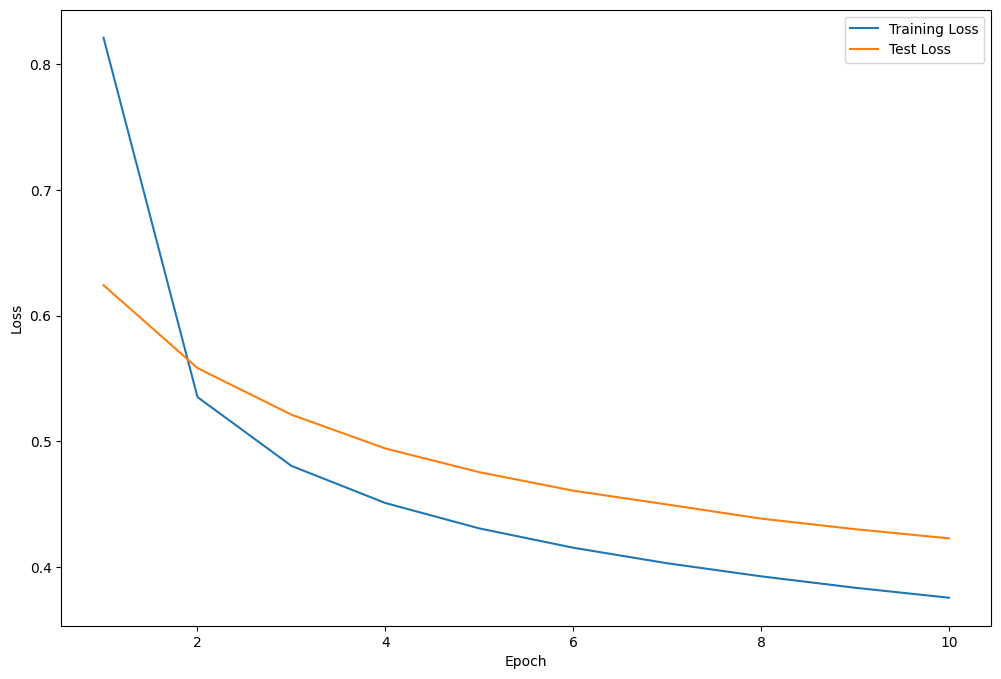

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation: Yes the model training was faster compared to random initialization.However it didn't perform better on test set as the accuracy remained almost same as random weight initialization.

In [ ]:
!pip install poutyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 11.3 MB/s eta 0:00:00


In [ ]:
# A pouytne training loop
from poutyne.framework import Model
# A few hyperparamters for the training loop
learning_rate = 0.01
epochs = 10

def poutyne_train(pytorch_model):

    # Select the optimizer and the loss function
    optimizer = optim.SGD(pytorch_model.parameters(), lr=learning_rate)
    loss_function = nn.CrossEntropyLoss()
    # Poutyne Model
    model = Model(pytorch_model, optimizer, loss_function, batch_metrics=['accuracy'])
    # Send the 'Poutyne model' on GPU/CPU whichever is available
    model.to(device)
    # Train
    model.fit_generator(training_loader,epochs=epochs)
    # Test
    test_loss, test_acc = model.evaluate_generator(test_loader)
    print(f'Test:\n\tLoss: {test_loss: .3f}\n\tAccuracy: {test_acc: .3f}')

    return None

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("THe model will run on ",device)

THe model will run on  cpu


In [ ]:
poutyne_train(model)

Epoch:  1/10 Train steps: 938 16.28s loss: 0.368240 acc: 86.995000                               
Epoch:  2/10 Train steps: 938 19.63s loss: 0.361759 acc: 87.190000                               
Epoch:  3/10 Train steps: 938 9.50s loss: 0.355760 acc: 87.345000                                
Epoch:  4/10 Train steps: 938 10.23s loss: 0.350299 acc: 87.553333                               
Epoch:  5/10 Train steps: 938 10.10s loss: 0.345164 acc: 87.743333                               
Epoch:  6/10 Train steps: 938 10.35s loss: 0.340311 acc: 87.901667                               
Epoch:  7/10 Train steps: 938 10.03s loss: 0.335709 acc: 88.103333                               
Epoch:  8/10 Train steps: 938 10.00s loss: 0.331367 acc: 88.250000                               
Epoch:  9/10 Train steps: 938 9.77s loss: 0.327270 acc: 88.386667                                
Epoch: 10/10 Train steps: 938 10.19s loss: 0.323396 acc: 88.475000                               
Test steps: 157 1.44

# **Question 8 : Adding batch normalization layer after every application of ReLU**

In [ ]:
class MPS(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()  #changing the tensor in 1D
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28,64),
      nn.ReLU(), #Activation function for first hidden layer
      nn.BatchNorm1d(64),
      nn.Linear(64,128),
      nn.ReLU(),  #For second hidden layer
      nn.BatchNorm1d(128),
      nn.Linear(128,10),
      # nn.Softmax(dim=1)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model1 = MPS()
print(model1)

MPS(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=128, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
summary(model=model1,input_size=(1,28,28),batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [64, 784]               0
            Linear-2                   [64, 64]          50,240
              ReLU-3                   [64, 64]               0
       BatchNorm1d-4                   [64, 64]             128
            Linear-5                  [64, 128]           8,320
              ReLU-6                  [64, 128]               0
       BatchNorm1d-7                  [64, 128]             256
            Linear-8                   [64, 10]           1,290
Total params: 60,234
Trainable params: 60,234
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.67
Params size (MB): 0.23
Estimated Total Size (MB): 1.09
----------------------------------------------------------------


In [ ]:
loss_function = nn.CrossEntropyLoss()   #Here the softmax function is already incorperated
                                        #this cross entropy loss function
optimizer = torch.optim.SGD(model1.parameters(),lr = 0.01) #Learning rate changed to 0.1


In [ ]:
epochs = 10
train_losses1=[]
test_losses1=[]
for t in range(epochs):
  print(f"Epoch {t+1}\n")
  train_loss=train(training_loader,model1,loss_function,optimizer)
  test_loss =test(test_loader,model1,loss_function)
  train_losses1.append(train_loss)
  test_losses1.append(test_loss)



Epoch 1

Loss : 2.533108 [   64/60000]
Loss : 0.760173 [ 6464/60000]
Loss : 0.427072 [12864/60000]
Loss : 0.736980 [19264/60000]
Loss : 0.516218 [25664/60000]
Loss : 0.500985 [32064/60000]
Loss : 0.427255 [38464/60000]
Loss : 0.575788 [44864/60000]
Loss : 0.528627 [51264/60000]
Loss : 0.505350 [57664/60000]
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.463633 

Epoch 2

Loss : 0.323189 [   64/60000]
Loss : 0.396985 [ 6464/60000]
Loss : 0.270205 [12864/60000]
Loss : 0.499762 [19264/60000]
Loss : 0.344205 [25664/60000]
Loss : 0.360469 [32064/60000]
Loss : 0.333468 [38464/60000]
Loss : 0.500650 [44864/60000]
Loss : 0.447310 [51264/60000]
Loss : 0.478784 [57664/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.417196 

Epoch 3

Loss : 0.244876 [   64/60000]
Loss : 0.469096 [ 6464/60000]
Loss : 0.265327 [12864/60000]
Loss : 0.413543 [19264/60000]
Loss : 0.304751 [25664/60000]
Loss : 0.350451 [32064/60000]
Loss : 0.323311 [38464/60000]
Loss : 0.481617 [44864/60000]
Loss : 0.442151 [51264/60000]

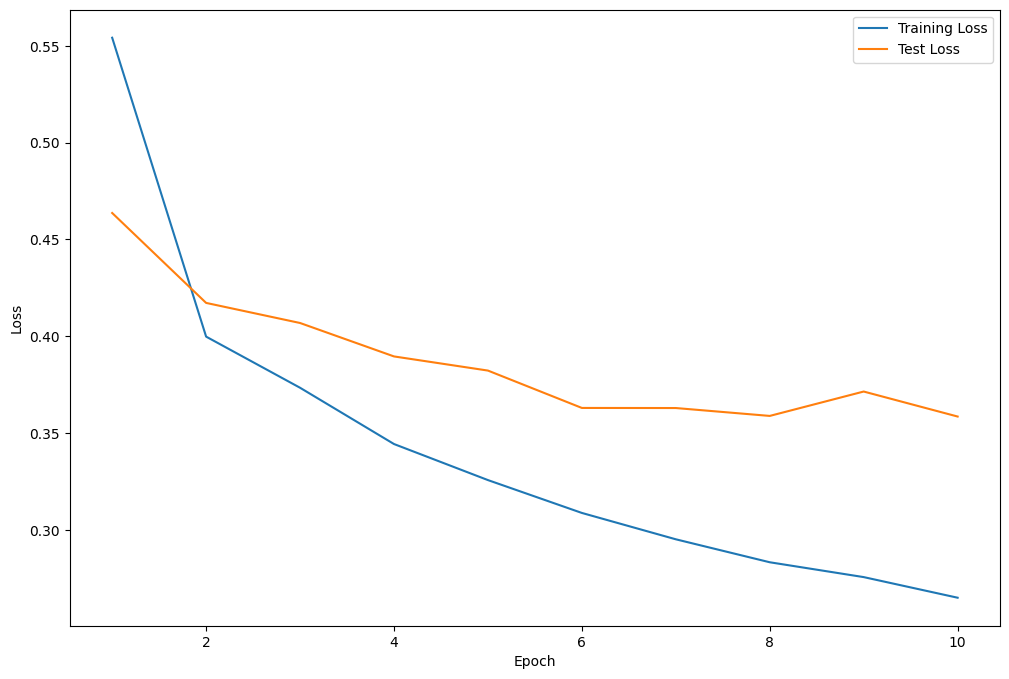

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1, epochs + 1), train_losses1, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses1, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation: Yes the model training was faster compared to random initialization.It did perform better in test set based on accuracy however if we see closly it didnt generalize it properly as it looks it is overfitting.Comparing with experiment 7,accuracy increased slightly due to addition of batch normalization.

# **Question 9 : Using drop-out in every hidden layer**

In [ ]:
class MPS(nn.Module):
  def __init__(self,dropout_prob=0.5):
    super().__init__()
    self.flatten = nn.Flatten()  #changing the tensor in 1D
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28,64),
      nn.ReLU(), #Activation function for first hidden layer
      nn.Dropout(p=dropout_prob),
      nn.Linear(64,128),
      nn.ReLU(),  #For second hidden layer
      nn.Dropout(p=dropout_prob),
      nn.Linear(128,10),
      # nn.Softmax(dim=1)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model3 = MPS(dropout_prob=0.4)
print(model3)

MPS(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
summary(model=model3,input_size=(1,28,28),batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [64, 784]               0
            Linear-2                   [64, 64]          50,240
              ReLU-3                   [64, 64]               0
           Dropout-4                   [64, 64]               0
            Linear-5                  [64, 128]           8,320
              ReLU-6                  [64, 128]               0
           Dropout-7                  [64, 128]               0
            Linear-8                   [64, 10]           1,290
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.67
Params size (MB): 0.23
Estimated Total Size (MB): 1.09
----------------------------------------------------------------


In [ ]:
loss_function = nn.CrossEntropyLoss()   #Here the softmax function is already incorperated
                                        #this cross entropy loss function
optimizer = torch.optim.SGD(model3.parameters(),lr = 0.01) #Learning rate changed to 0.01


In [ ]:
epochs = 10
train_losses1=[]
test_losses1=[]
for t in range(epochs):
  print(f"Epoch {t+1}\n")
  train_loss=train(training_loader,model3,loss_function,optimizer)
  test_loss =test(test_loader,model3,loss_function)
  train_losses1.append(train_loss)
  test_losses1.append(test_loss)



Epoch 1

Loss : 2.308612 [   64/60000]
Loss : 2.257022 [ 6464/60000]
Loss : 2.064328 [12864/60000]
Loss : 1.883193 [19264/60000]
Loss : 1.612786 [25664/60000]
Loss : 1.425327 [32064/60000]
Loss : 1.418751 [38464/60000]
Loss : 1.320950 [44864/60000]
Loss : 1.232949 [51264/60000]
Loss : 1.159742 [57664/60000]
Test Error: 
 Accuracy: 64.2%, Avg loss: 0.979839 

Epoch 2

Loss : 1.256418 [   64/60000]
Loss : 1.038645 [ 6464/60000]
Loss : 0.859825 [12864/60000]
Loss : 1.120967 [19264/60000]
Loss : 0.965393 [25664/60000]
Loss : 1.003323 [32064/60000]
Loss : 1.013175 [38464/60000]
Loss : 0.891415 [44864/60000]
Loss : 1.022513 [51264/60000]
Loss : 0.887948 [57664/60000]
Test Error: 
 Accuracy: 72.1%, Avg loss: 0.765098 

Epoch 3

Loss : 0.863241 [   64/60000]
Loss : 0.981381 [ 6464/60000]
Loss : 0.700801 [12864/60000]
Loss : 0.833900 [19264/60000]
Loss : 0.751126 [25664/60000]
Loss : 0.794821 [32064/60000]
Loss : 0.857549 [38464/60000]
Loss : 0.886519 [44864/60000]
Loss : 0.958116 [51264/60000]

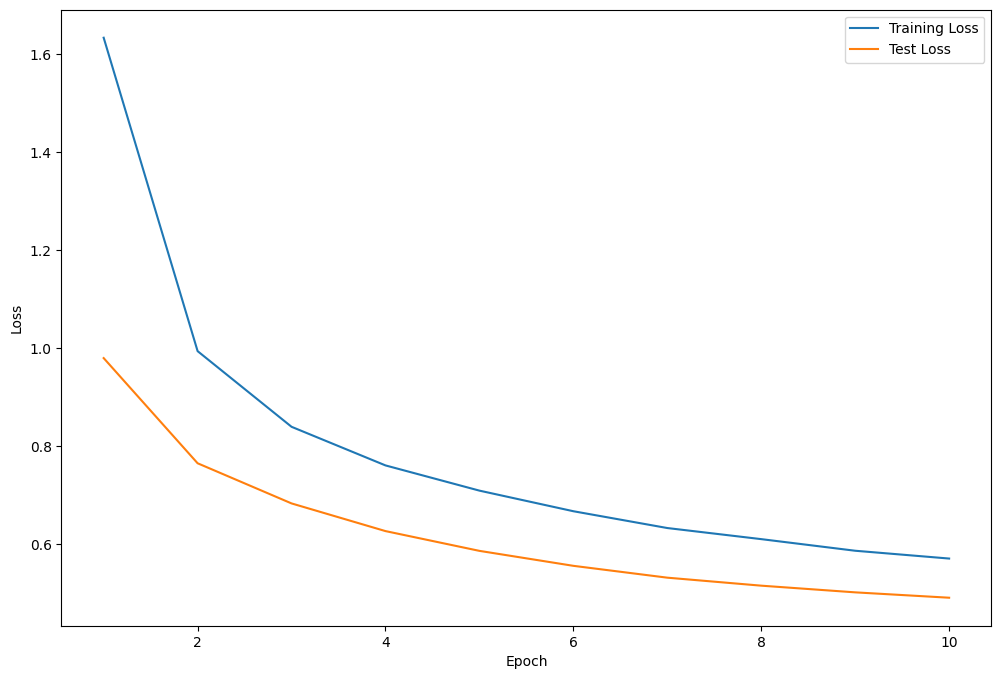

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1, epochs + 1), train_losses1, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses1, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation: The purpose of generalizing has been served as we see the test loss is not overfitting however with this dropout probability the model didnot perform better.It can perform better if appropriate probabilities is chosen.

# **Question 10:: Using L2 regularization**

In [ ]:
class MPS(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()  #changing the tensor in 1D
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28,64),
      nn.ReLU(), #Activation function for first hidden layer
      nn.Linear(64,128),
      nn.ReLU(),  #For second hidden layer
      nn.Linear(128,10),
      # nn.Softmax(dim=1)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model_mps = MPS()
print(model_mps)

MPS(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
summary(model=model_mps,input_size=(1,28,28),batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [64, 784]               0
            Linear-2                   [64, 64]          50,240
              ReLU-3                   [64, 64]               0
            Linear-4                  [64, 128]           8,320
              ReLU-5                  [64, 128]               0
            Linear-6                   [64, 10]           1,290
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.58
Params size (MB): 0.23
Estimated Total Size (MB): 0.99
----------------------------------------------------------------


In [ ]:
optimizer_forL2 = torch.optim.SGD(model_mps.parameters(),lr = 0.01,weight_decay=0.001)

In [ ]:
epochs = 10
train_losses1=[]
test_losses1=[]
for t in range(epochs):
  print(f"Epoch {t+1}\n")
  train_loss=train(training_loader,model_mps,loss_function,optimizer_forL2)
  test_loss =test(test_loader,model_mps,loss_function)
  train_losses1.append(train_loss)
  test_losses1.append(test_loss)


Epoch 1

Loss : 2.297134 [   64/60000]
Loss : 2.261861 [ 6464/60000]
Loss : 2.145442 [12864/60000]
Loss : 1.981749 [19264/60000]
Loss : 1.530341 [25664/60000]
Loss : 1.281476 [32064/60000]
Loss : 1.169411 [38464/60000]
Loss : 0.978171 [44864/60000]
Loss : 0.947555 [51264/60000]
Loss : 0.866606 [57664/60000]
Test Error: 
 Accuracy: 68.7%, Avg loss: 0.848359 

Epoch 2

Loss : 0.896554 [   64/60000]
Loss : 0.903122 [ 6464/60000]
Loss : 0.653153 [12864/60000]
Loss : 0.810963 [19264/60000]
Loss : 0.710211 [25664/60000]
Loss : 0.686678 [32064/60000]
Loss : 0.776437 [38464/60000]
Loss : 0.716973 [44864/60000]
Loss : 0.720883 [51264/60000]
Loss : 0.673308 [57664/60000]
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.670548 

Epoch 3

Loss : 0.623649 [   64/60000]
Loss : 0.715226 [ 6464/60000]
Loss : 0.487026 [12864/60000]
Loss : 0.688198 [19264/60000]
Loss : 0.634589 [25664/60000]
Loss : 0.592833 [32064/60000]
Loss : 0.641641 [38464/60000]
Loss : 0.653758 [44864/60000]
Loss : 0.659013 [51264/60000]

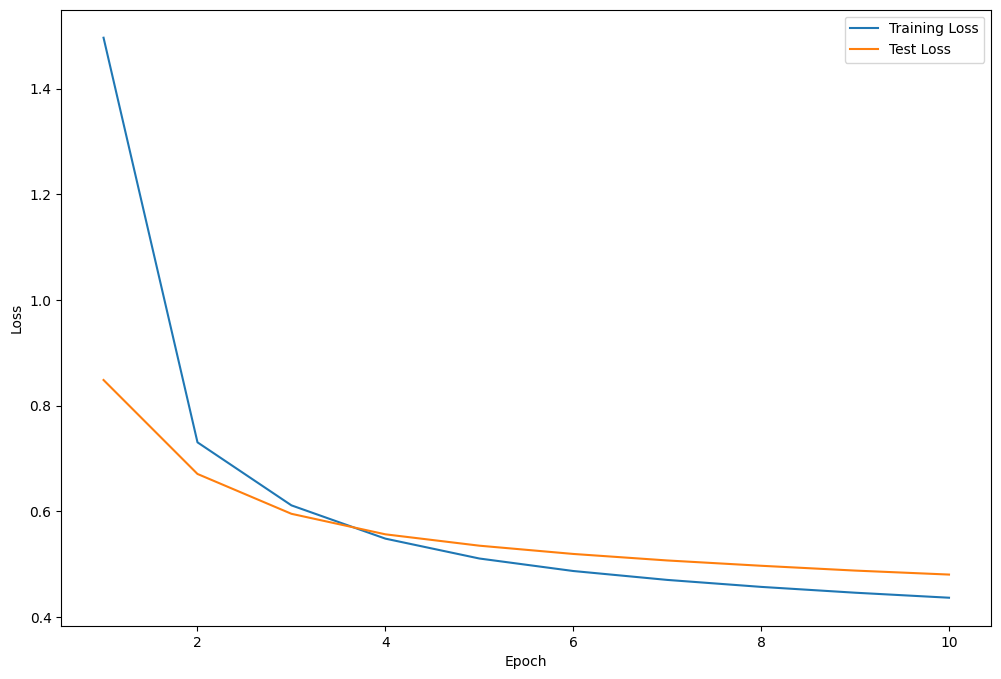

In [79]:
plt.figure(figsize=(12,8))
plt.plot(range(1, epochs + 1), train_losses1, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses1, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation:The model performed performed slightly better compared to normal training in terms of accuracy ,well in terms of generalization it looks like it overfits.However the choice of weight decay plays an important role in this.



